#  **Introducción**
El objetivo del ejercicio es obtener un modelo que nos arroje las mejores predicciones de ventas futuras teniendo en cuenta la estacionalidad, con especial foco en campañas concretas (Navidad, Black Friday,etc), de una cadena de tiendas en el sector retail.

El dataset seleccionado son las ventas que ha realizado Adidas en los años 2020 y 2021 en Estados Unidos. Este dataset nos ayudará a entrenar diferentes modelos, para analizar los resultados y obtener las mejores predicciones.

Los resultados nos ayudarán (como empresa) a entender y facilitar una estacimación del comportamiento de ventas futuras. Se pretende así, poder actuar de manera óptima, por ejemplo, en campañas de marketing, acciones comerciales, gestión del stock, entre otras.

Además, nos ayudará a responder a otras cuestiones adicionales que contribuyan a facilitar las futuras tomas de decisiones.
Algunos de los puntos de análisis que podemos realizar son:

*   Analizar los canales de venta para estudiar la rentabilidad de cada uno y poder reaccionar ante aquellos que no estén generando los resultados esperados.

*   Analizar las ventas de las diferentes zonas geográficas y así poder desempeñar diferentes acciones en caso de ser necesarias, para mejorar resultados con una estrategia de diferenciación por zonas.

*   Analizar los productos ofrecidos, su acogida en el mercado y por los consumidores.

*   Analizar los períodos o estaciones de mejores resultados, para potenciarlos o mejorar los que no llegan a cumplir los objetivos esperados por la empresa.

A continuación, realizaremos los pasos necesarios para realizar un análisis completo, inclueyendo: la selección del dataset, análisis de las variables del dataset, limpieza de datos, preprocesamiento, elección del modelo y la selección del modelo con el que obtener los mejores resultados.


# **Importación del Dataset**
El dataset seleccionado contine las ventas realizas por Adidas en Estados Unidos durante los años 2020 y 2021. Ha sido obtenido de Kaggle.

In [1]:
# Seleccionamos el dataset que se encuentra en nuestro drive.
# Importamos las librerias que vamos utilizar

from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/Adidas US Sales Datasets.xlsx"

data = pd.read_excel(ruta)

print(data.head())


Mounted at /gdrive
      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              0.50 

In [2]:
# Imprimimos las columnas que contine nuestro dataset e información adicional
data.info()
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


Se puede observar que tenemos un dataset con las siguientes dimensiones: 9648 filas y 13 columnas, también observamos que las columnas se conforman por diferente tipos de datos "object" (tipo texto=, "float"(decimales), "int"(enteros).

In [3]:
# Realizamos la comprobación de valores nulos, en este caso, no tenemos valores nulos en nuestro dataset
data.isnull().sum().sum()

0

In [4]:
# Realizamos la comprobación de valores duplicados, y no obtenemos valores duplicados
data = data.drop_duplicates()

# **Análisis de variables**
Tal y como hemos observado anteriormente nuestro dataset se conforma de 13 columnas. A continuación analizaremos el tipo de varibales que tenemos en nuestro dataset.



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 1.0+ MB


In [6]:
data.head()

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              0.50     In-store  
1          150000.0              0.30     In-store  
2          140000.0              0.35     In-store  
3          133875.0              0.35     In-store  
4          162000.0              0.30     In-store

Realizamos el análisis de cada una de las columnas que conforman nuestro dataset:
*   Retailer: variable dependiente, categórica - nominal
*   Retailer ID: variable dependiente, cuantitativa - discreta
*   Invoice Date: variable dependiente, cuantitativa - discreta
*   Region: variable dependiente, categórica - nominal
*   State: variable dependiente, categórica - nominal
*   City: variable dependiente, categórica - nominal
*   Product: variable dependiente, categórica - nominal
*   Price per Unit: variable dependiente, cuantitativa - continua
*   Units Sold: variable dependiente, cuantitativa - discreta
*   Total Sales: **variable independiente**, cuantitativa - continua
*   Operating Profit: variable dependiente, cuantitativa - continua
*   Operating Margin: variable dependiente, cuantitativa - continua
*   Sales Method: variable dependiente, categórica - nominal

Observamos que la variable independiente es la columna "Total Sales" y el resto de variables comprenderían las variables dependientes.

# **Análisis del comportamiento de ventas**
En este apartado vamos a analizar el comportamiento de las ventas de nuestro dataset, analizamos los datos originales del dataset.

In [7]:
# Separamos la columna "Invoice Date" en 3 columnas para obtener día, mes y año, para hacer un análisis de tendencias más completo
data["Day"] = data["Invoice Date"].dt.day
data["Month"] = data["Invoice Date"].dt.month
data["Year"] = data["Invoice Date"].dt.year

In [8]:
# Añadimos una nueva columna para tener las estaciones para poder analizar las ventas en esos períodos
seasons = {1:"Winter",2:"Winter",3:"Spring",4:"Spring",5:"Spring",6:"Summer",7:"Summer",8:"Summer",9:"Autumn",10:"Autumn",11:"Autumn",12:"Winter"}
data["Season"] = data["Month"].map(seasons)

In [9]:
#Ventas por estación:
#¿En qué estación se realizan más ventas en promedio?
season_sales = data.loc[:,["Season","Total Sales"]].groupby(by=["Season"],as_index=False).sum().sort_values(by="Total Sales",ascending=0)
season_sales

Season  Total Sales
2  Summer  262394267.0
3  Winter  218421252.0
1  Spring  209656774.0
0  Autumn  209429832.0

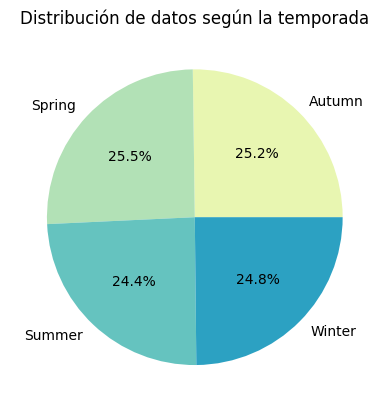

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
region_counts = data.groupby('Season').size()
plt.pie(region_counts, labels=region_counts.index, colors=sns.color_palette('YlGnBu'), autopct='%1.1f%%')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Distribución de datos según la temporada')
plt.show()

Se puede decir que las ventas se reparten de manera equitativa en todas las estaciones. Analizando los datos agrupados, se obtiene que los meses con más ventas coinciden con verano, pero la diferencia es mínima en comparación con el resto de estaciones.

In [11]:
# Veamos los meses con mayor ventas:
monthly_sales = data.loc[:,["Month","Total Sales"]].groupby(by=["Month"],as_index=False).sum().sort_values(by="Total Sales",ascending=0).head()
monthly_sales

Month  Total Sales
6       7   95480694.0
7       8   92166201.0
11     12   85841957.0
4       5   80507695.0
8       9   77661459.0

Analizando los datos agrupados, se obtiene que los meses con más ventas coinciden con los meses de verano y diciembre. El mes de mayor número de ventas es Julio (mes 7), seguido de Agosto (mes 8) y aunque la diferencia entre ambos meses es baja, se puede observar una diferencia algo mayor respecto con las cifras obtenidas en Diciembre (mes 12).


In [12]:
# Veamos los meses con menor ventas:
monthly_sales = data.loc[:,["Month","Total Sales"]].groupby(by=["Month"],as_index=False).sum().sort_values(by="Total Sales",ascending=1).head()
monthly_sales

Month  Total Sales
2       3   56809109.0
1       2   61100153.0
9      10   63911033.0
10     11   67857340.0
0       1   71479142.0

En cuanto a los meses con un menor número de ventas, observamos que son Marzo (mes 3) y Febrero (mes 2).


Añadimos gráficos de ventas para poder visualizar las tendencias de las ventas.

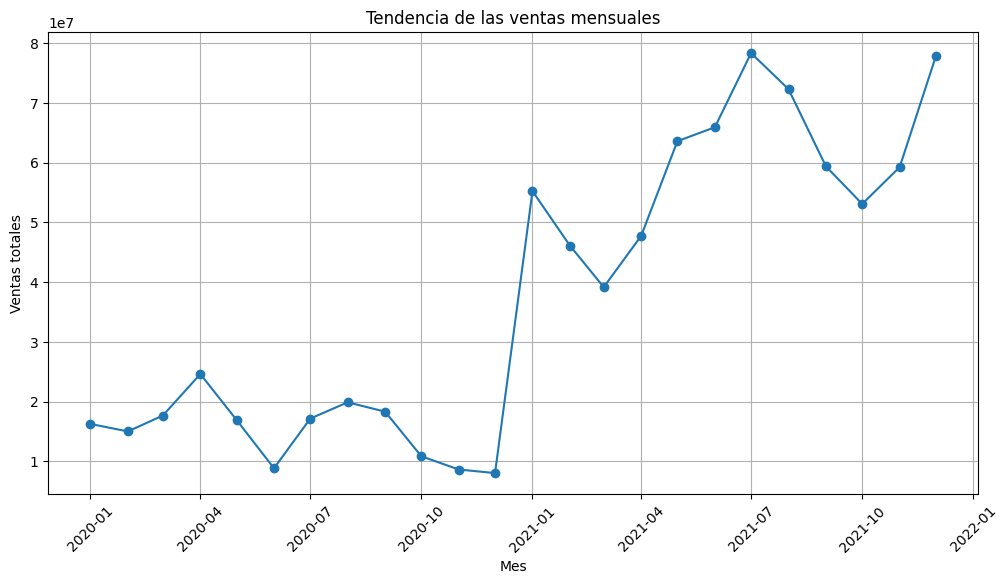

In [13]:
import matplotlib.pyplot as plt

# Agrupamos por mes y calculamos las ventas totales de cada mes
ventas_mensuales = data.groupby(data['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

# Convertimos el índice (que es de tipo 'Periodo') en objetos DateTime
ventas_mensuales.index = ventas_mensuales.index.to_timestamp()

# Trazamos las tendencias de ventas a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales.index, ventas_mensuales.values, marker='o')
plt.xlabel('Mes')
plt.ylabel('Ventas totales')
plt.title('Tendencia de las ventas mensuales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Veamos algunos gráficos acerca de la distribución, las tendencias y las ventas acumuladas de los diferentes retailers presentes en el dataset:

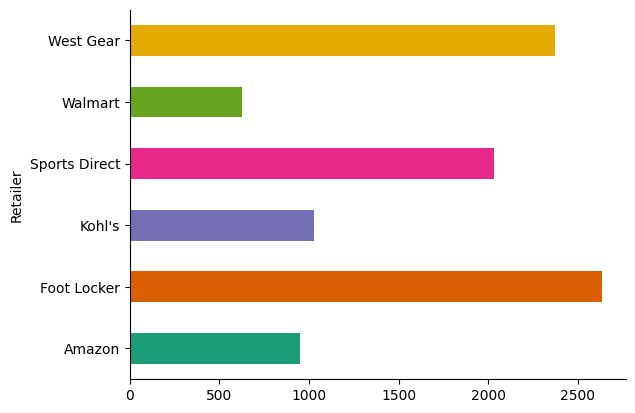

In [14]:
# Observamos la distribución de ventas por retailer

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Retailer').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

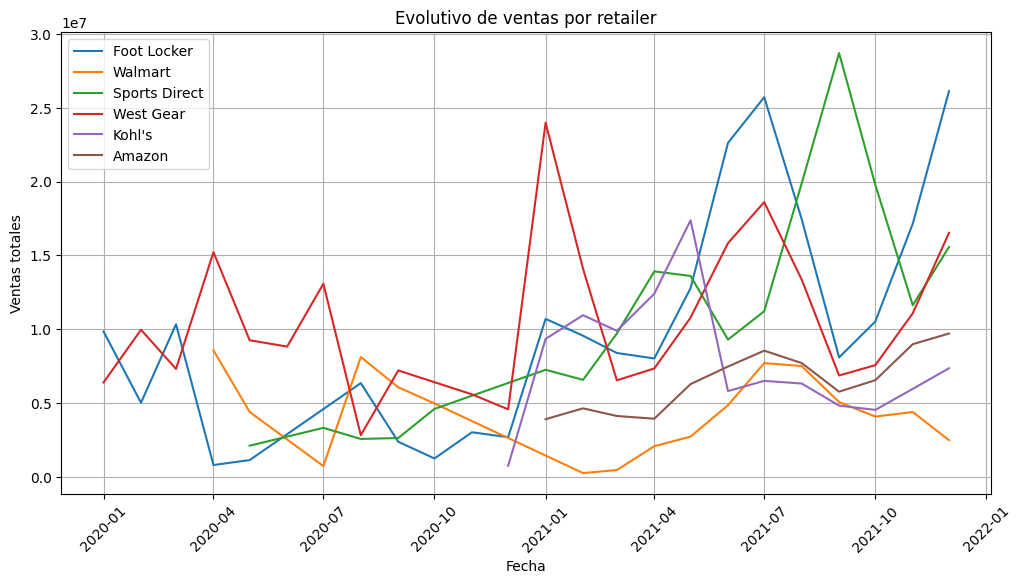

In [15]:
import matplotlib.pyplot as plt

# Obtenemos la lista de retailer
retailer = data['Retailer'].unique()

# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 6))

# Iteramos sobre cada retailer y trazar su evolución de ventas en el tiempo
for id in retailer:

    datos_retailer = data[data['Retailer'] == id]

    # Agrupamos por mes y calcular las ventas totales de cada mes
    ventas_mensuales = datos_retailer.groupby(datos_retailer['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

    # Convertimos el índice a objetos DateTime
    ventas_mensuales.index = ventas_mensuales.index.to_timestamp()

    # Tramamos la evolución de ventas en el tiempo para cada retailer
    plt.plot(ventas_mensuales.index, ventas_mensuales.values, label=id)

# Configuramos etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Ventas totales')
plt.title('Evolutivo de ventas por retailer')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()


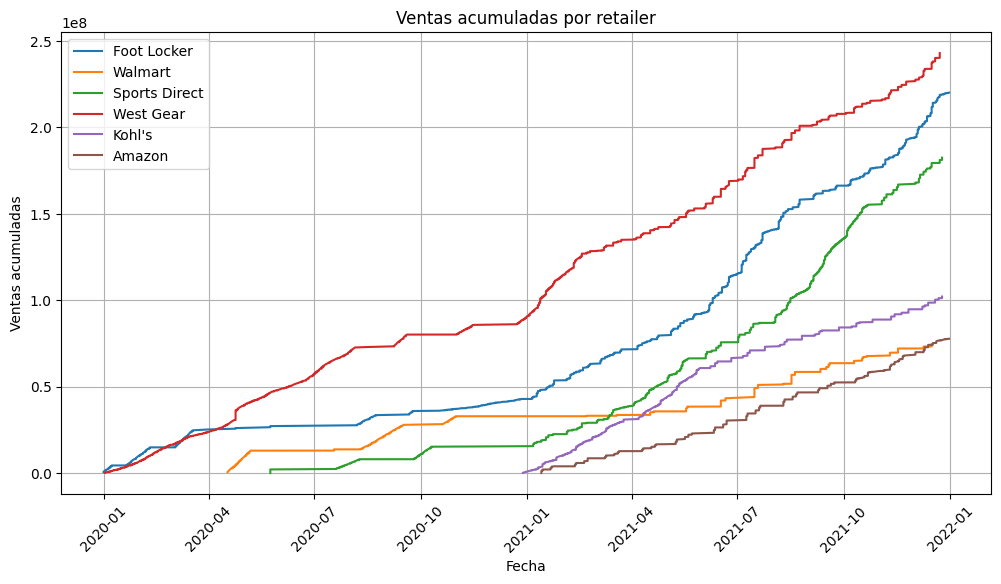

In [16]:
import matplotlib.pyplot as plt

# Obtenemos la lista de minoristas únicos
minoristas_unicos = data['Retailer'].unique()

# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 6))

# Iteramos sobre cada minorista y trazar sus ventas acumulativas en el tiempo
for minorista in minoristas_unicos:
    # Filtramos los datos para el minorista actual
    datos_minorista = data[data['Retailer'] == minorista]

    # Ordenamos los datos por fecha de factura
    datos_minorista = datos_minorista.sort_values(by='Invoice Date')

    # Calculamos las ventas acumulativas
    datos_minorista['Ventas_Acumuladas'] = datos_minorista['Total Sales'].cumsum()

    # Tramamos las ventas acumulativas en el tiempo para el minorista actual
    plt.plot(datos_minorista['Invoice Date'], datos_minorista['Ventas_Acumuladas'], label=minorista)

# Configuramos etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Ventas acumuladas')
plt.title('Ventas acumuladas por retailer')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()


Veamos ahora algunos gráficos acerca de la distribución, las tendencias y las ventas acumuladas de las diferentes regiones presentes en el dataset:

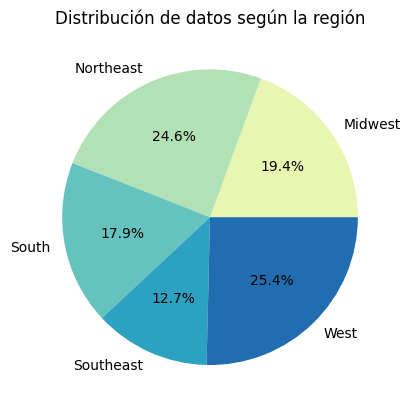

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
region_counts = data.groupby('Region').size()
plt.pie(region_counts, labels=region_counts.index, colors=sns.color_palette('YlGnBu'),autopct='%1.1f%%')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Distribución de datos según la región')
plt.show()

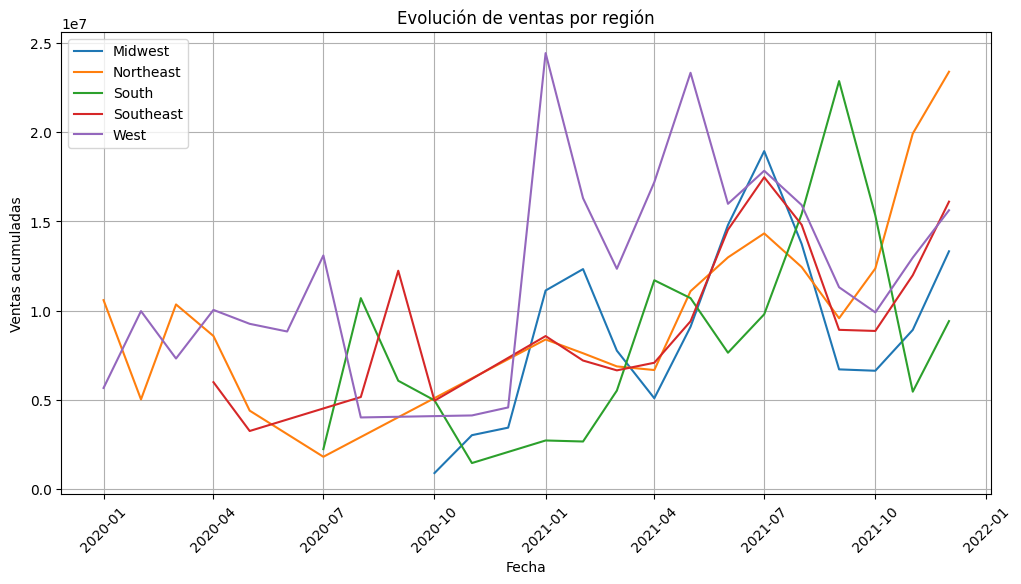

In [18]:
import matplotlib.pyplot as plt

# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 6))

# Iteramos sobre cada región y trazamos su evolución de ventas en el tiempo
for region, region_data in data.groupby('Region'):

    # Agrupamos por mes y calcular las ventas totales de cada mes
    ventas_mensuales = region_data.groupby(region_data['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

    # Convertimos el índice a objetos DateTime
    ventas_mensuales.index = ventas_mensuales.index.to_timestamp()

    # Tramamos la evolución de ventas en el tiempo para cada región
    plt.plot(ventas_mensuales.index, ventas_mensuales.values, label=region)

# Configuramos etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Ventas acumuladas')
plt.title('Evolución de ventas por región')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()

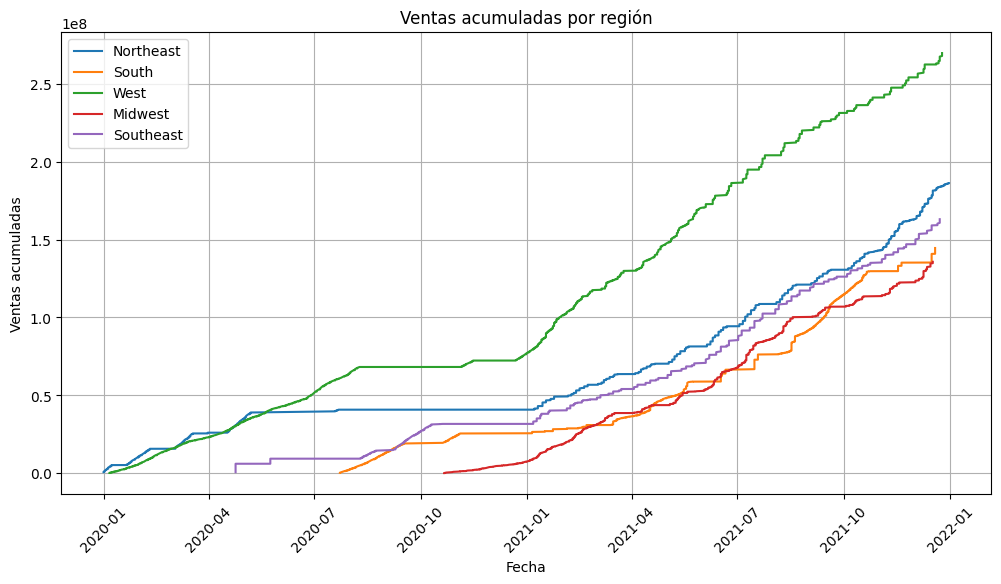

In [19]:
import matplotlib.pyplot as plt

# Obtenemos la lista de regiones únicas
regiones_unicas = data['Region'].unique()

# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 6))

# Iteramos sobre cada región y trazar sus ventas acumulativas en el tiempo
for region in regiones_unicas:
    # Filtramos los datos para la región actual
    datos_region = data[data['Region'] == region]

    # Ordenamos los datos por fecha de factura
    datos_region = datos_region.sort_values(by='Invoice Date')

    # Calculamos las ventas acumulativas
    datos_region['Ventas_Acumuladas'] = datos_region['Total Sales'].cumsum()

    # Tramamos las ventas acumulativas en el tiempo para la región actual
    plt.plot(datos_region['Invoice Date'], datos_region['Ventas_Acumuladas'], label=region)

# Configuramos etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Ventas acumuladas')
plt.title('Ventas acumuladas por región')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()

Veamos ahora algunos gráficos acerca de la distribución, las tendencias y las ventas acumuladas según diferentes productos presentes en el dataset:

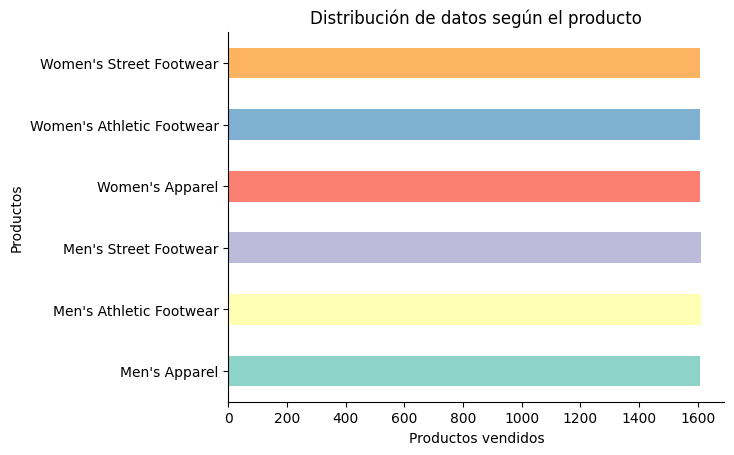

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

product_counts = data.groupby('Product').size()

product_counts.plot(kind='barh', color=sns.color_palette('Set3'))

plt.gca().spines[['top', 'right']].set_visible(False)

plt.title('Distribución de datos según el producto')
plt.xlabel('Productos vendidos')
plt.ylabel('Productos')

plt.show()

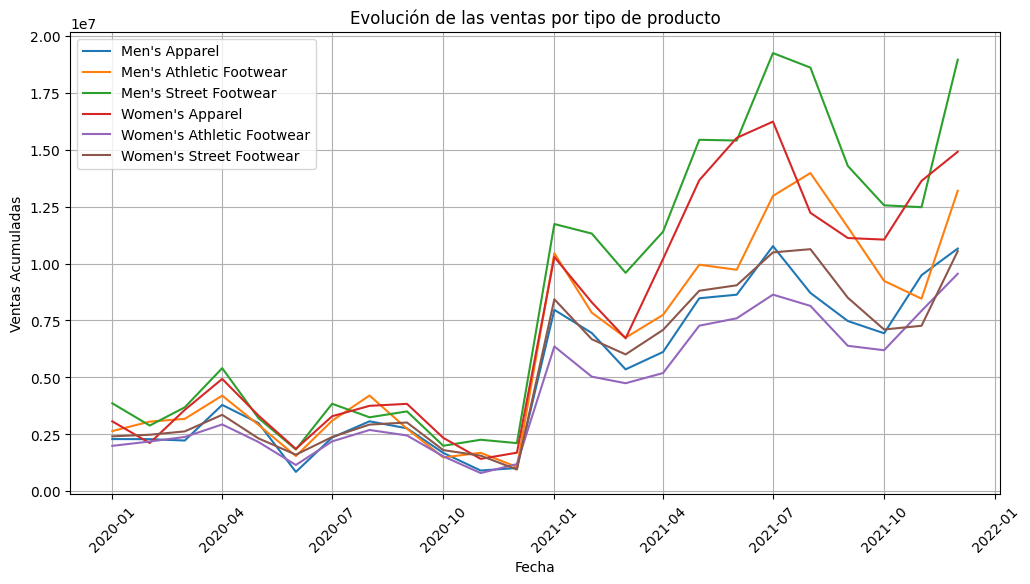

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for product, product_data in data.groupby('Product'):
    monthly_sales = product_data.groupby(product_data['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

    monthly_sales.index = monthly_sales.index.to_timestamp()

    plt.plot(monthly_sales.index, monthly_sales.values, label=product)

plt.xlabel('Fecha')
plt.ylabel('Ventas Acumuladas')
plt.title('Evolución de las ventas por tipo de producto')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.legend()

plt.show()

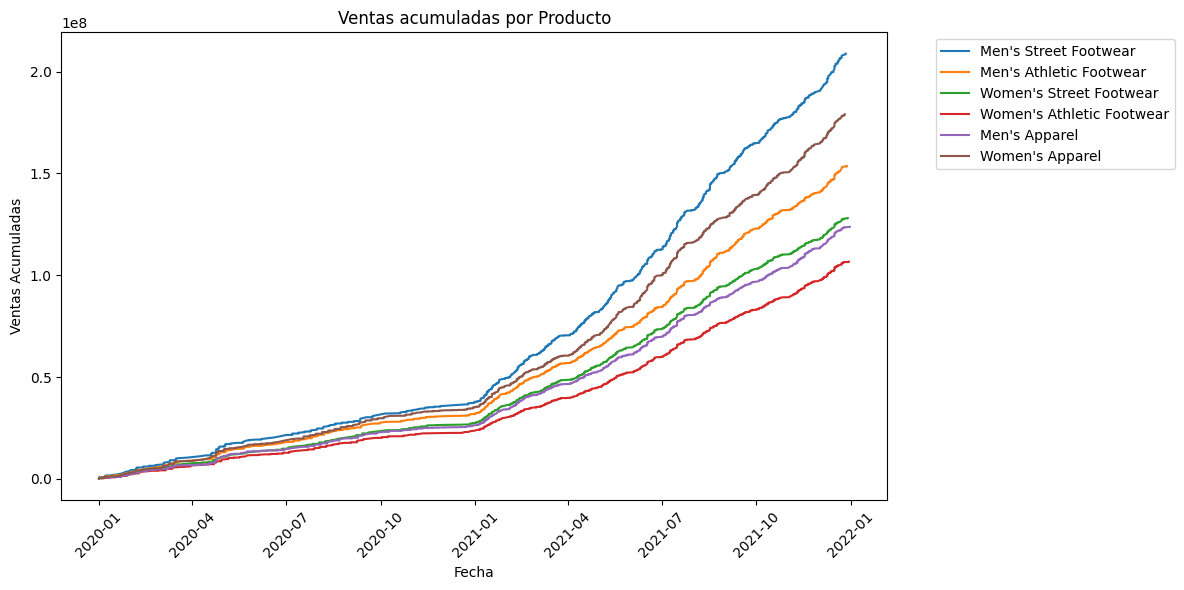

In [22]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

productos_unicos = data['Product'].unique()

for producto in productos_unicos:
    product_data = data[data['Product'] == producto]
    product_data = product_data.sort_values(by='Invoice Date')
    product_data['Ventas acumuladas'] = product_data['Total Sales'].cumsum()
    plt.plot(product_data['Invoice Date'], product_data['Ventas acumuladas'], label=producto)

plt.xlabel('Fecha')
plt.ylabel('Ventas Acumuladas')
plt.title('Ventas acumuladas por Producto')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

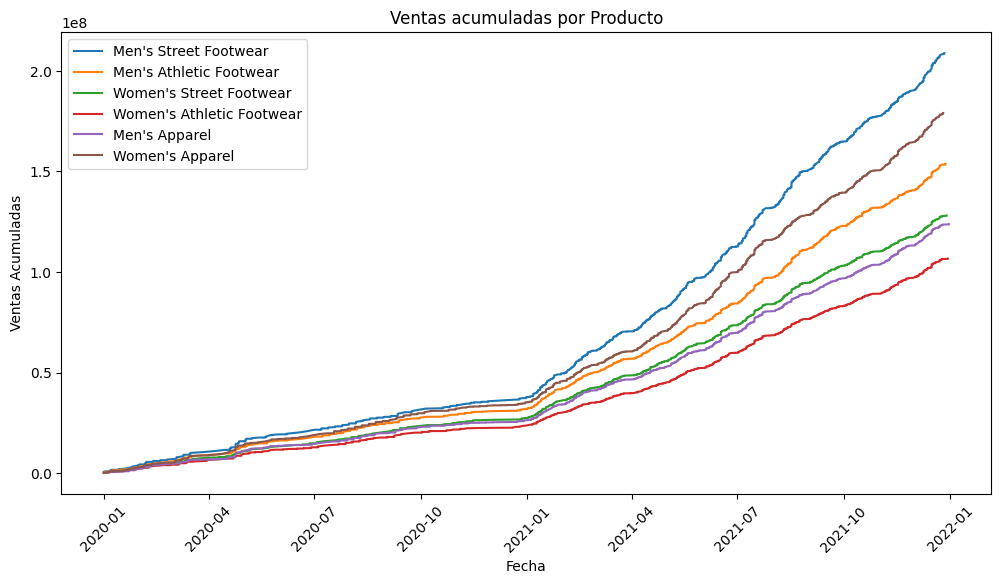

In [23]:
import matplotlib.pyplot as plt

productos_unicos = data['Product'].unique()

plt.figure(figsize=(12, 6))

for producto in productos_unicos:
    product_data = data[data['Product'] == producto]

    product_data = product_data.sort_values(by='Invoice Date')

    product_data['Ventas Acumuladas'] = product_data['Total Sales'].cumsum()  # Corrected label name

    plt.plot(product_data['Invoice Date'], product_data['Ventas Acumuladas'], label=producto)

plt.xlabel('Fecha')
plt.ylabel('Ventas Acumuladas')
plt.title('Ventas acumuladas por Producto')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Veamos ahora algunos gráficos acerca de la distribución, las tendencias y las ventas acumuladas según diferentes puntos de venta presentes en el dataset:

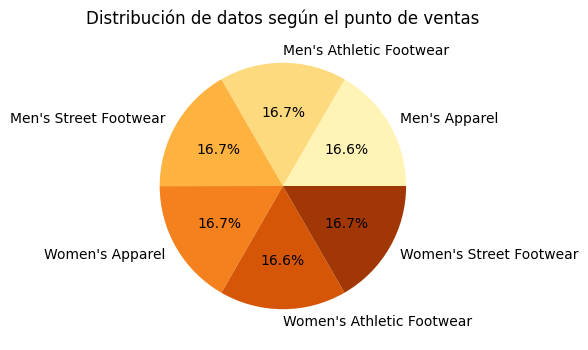

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

region_counts = data.groupby('Product').size()

plt.figure(figsize=(6, 4))

plt.pie(region_counts, labels=region_counts.index, colors=sns.color_palette('YlOrBr'), autopct='%1.1f%%')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Distribución de datos según el punto de ventas')

plt.show()

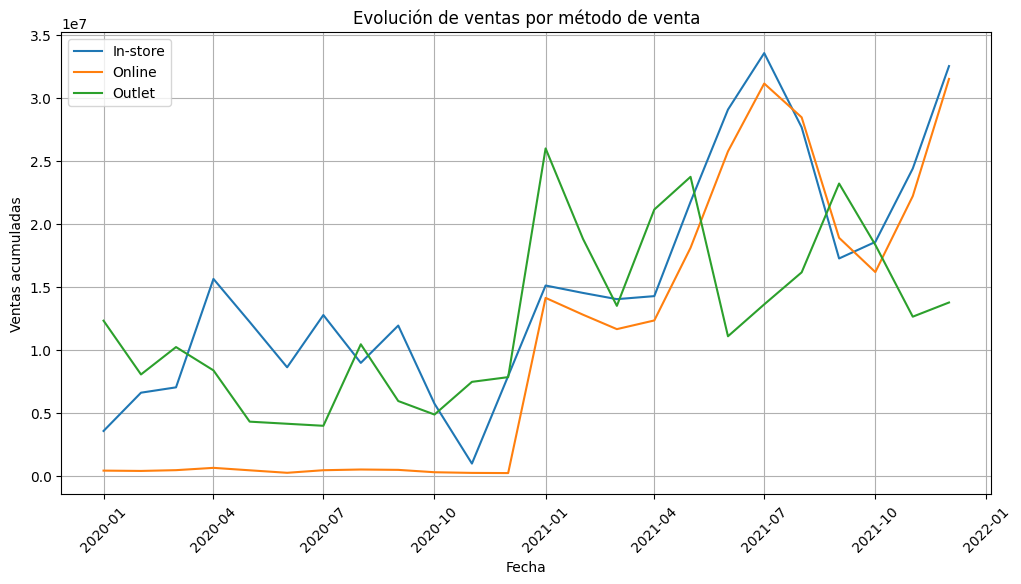

In [25]:
import matplotlib.pyplot as plt

# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 6))

# Iteramos sobre cada método de venta y trazamos su evolución de ventas en el tiempo
for sales_method, method_data in data.groupby('Sales Method'):
    # Agrupamos por mes y calculamos las ventas totales de cada mes
    ventas_mensuales = method_data.groupby(method_data['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

    # Convertimos el índice a objetos DateTime
    ventas_mensuales.index = ventas_mensuales.index.to_timestamp()

    # Tramamos la evolución de ventas en el tiempo para cada método de venta
    plt.plot(ventas_mensuales.index, ventas_mensuales.values, label=sales_method)

# Configuramos etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Ventas acumuladas')
plt.title('Evolución de ventas por método de venta')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()

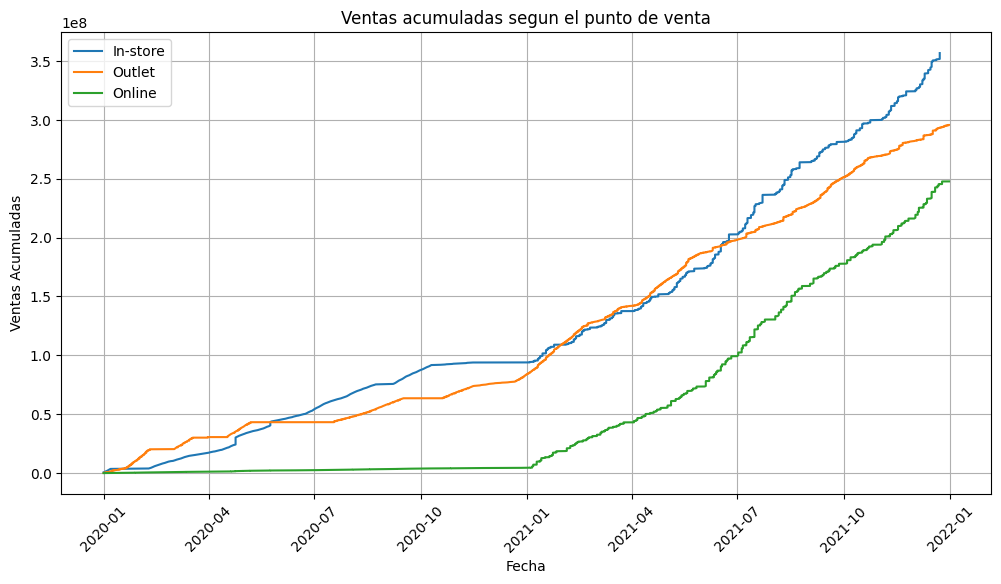

In [26]:
import matplotlib.pyplot as plt

# Get the list of unique sales methods
sales_methods_unique = data['Sales Method'].unique()

# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over each sales method and plot its cumulative sales over time
for sales_method in sales_methods_unique:
    # Filter the data for the current sales method
    sales_method_data = data[data['Sales Method'] == sales_method]

    # Sort the data by invoice date
    sales_method_data = sales_method_data.sort_values(by='Invoice Date')

    sales_method_data['Ventas acumuladas'] = sales_method_data['Total Sales'].cumsum()

    plt.plot(sales_method_data['Invoice Date'], sales_method_data['Ventas acumuladas'], label=sales_method)

plt.xlabel('Fecha')
plt.ylabel('Ventas Acumuladas')
plt.title('Ventas acumuladas segun el punto de venta')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


# **Limpieza de datos**
En este apartado vamos a transformar nuestro dataset, por ejemplo realizando acciones como eliminar caracteres especiales, eliminar columnas, cambiar nombres de columnas, etc. todas las acciones las realizaremos para obtener un dataset óptimo para poder entrenar nuestro modelo sin variables innecesarias.

Independientemente de una limpieza preliminar, a lo largo de los siguientes pasos iremos realizando limpiezas puntuales en caso de ser necesario.

In [27]:
# Borramos las columnas "Retailer ID" e "Invoice Date" porque no son relevantes para el análisis
data.drop(["Retailer ID", "Invoice Date"],axis=1,inplace=True)

Actualizamos el nombre de las variables del dataframe eliminando los espacios

In [28]:
# Reemplazamos los espacios por "_" en los nombres de las columnas
variables = ['Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method']

# Sustituir espacios por '_'
variables_actualizadas = [var.replace(' ', '_') for var in variables]

print(variables_actualizadas )

['Retailer_ID', 'Invoice_Date', 'Price_per_Unit', 'Units_Sold', 'Total_Sales', 'Operating_Profit', 'Operating_Margin', 'Sales_Method']


In [29]:
data.rename(columns=dict(zip(variables, variables_actualizadas)), inplace=True)

In [30]:
data.columns

Index(['Retailer', 'Region', 'State', 'City', 'Product', 'Price_per_Unit',
       'Units_Sold', 'Total_Sales', 'Operating_Profit', 'Operating_Margin',
       'Sales_Method', 'Day', 'Month', 'Year', 'Season'],
      dtype='object')

In [31]:
columns= ['Price_per_Unit', 'Units_Sold', 'Total_Sales','Operating_Profit', 'Operating_Margin']

In [32]:
# Realizamos diversas acciones sobre el dataframe para ir realizando una limpieza y conversiones de tipo de datos

for columna in columns:
    # Convertir los valores de la columna a cadenas
    data[columna] = data[columna].astype(str)

    # Reemplazar los caracteres no deseados en las cadenas de la columna
    data[columna] = data[columna].str.replace(r'[$, ]', '', regex=True)

    # Convertir las cadenas limpias a números de punto flotante
    data[columna] = data[columna].astype(float)

In [33]:
# Mostramos el dataset para comprobar algunos de los cambios realizados: eliminación columnas, reemplazar caracteres en nombres de columnas, etc.
data.head()

Retailer     Region     State      City                    Product  \
0  Foot Locker  Northeast  New York  New York      Men's Street Footwear   
1  Foot Locker  Northeast  New York  New York    Men's Athletic Footwear   
2  Foot Locker  Northeast  New York  New York    Women's Street Footwear   
3  Foot Locker  Northeast  New York  New York  Women's Athletic Footwear   
4  Foot Locker  Northeast  New York  New York              Men's Apparel   

   Price_per_Unit  Units_Sold  Total_Sales  Operating_Profit  \
0            50.0      1200.0     600000.0          300000.0   
1            50.0      1000.0     500000.0          150000.0   
2            40.0      1000.0     400000.0          140000.0   
3            45.0       850.0     382500.0          133875.0   
4            60.0       900.0     540000.0          162000.0   

   Operating_Margin Sales_Method  Day  Month  Year  Season  
0              0.50     In-store    1      1  2020  Winter  
1              0.30     In-store    2      1  2020  Winter  
2              0.35     In-store    3      1  2020  Winter  
3              0.35     In-store    4      1  2020  Winter  
4              0.30     In-store    5      1  2020  Winter

In [34]:
# Comprobamos el cambio del tipo de variable
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9647
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Region            9648 non-null   object 
 2   State             9648 non-null   object 
 3   City              9648 non-null   object 
 4   Product           9648 non-null   object 
 5   Price_per_Unit    9648 non-null   float64
 6   Units_Sold        9648 non-null   float64
 7   Total_Sales       9648 non-null   float64
 8   Operating_Profit  9648 non-null   float64
 9   Operating_Margin  9648 non-null   float64
 10  Sales_Method      9648 non-null   object 
 11  Day               9648 non-null   int64  
 12  Month             9648 non-null   int64  
 13  Year              9648 non-null   int64  
 14  Season            9648 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 1.2+ MB


# **EDA: Análisis Exploratorio de Datos**
Tal y como es habitual, para poder realizar un proyecto de Machine Learning, es necesario realizar un EDA previo para entender y comprender los datos que tenemos.

Aunque hemos ido realizando anteriormente pinceladas de análisis, en este apartado tenemos que centrarnos en buscar patrones y distribuciones que nos ayudaran a comprender mejor nuestros datos.

In [35]:
# Comprobamos nuevamente nuestro dataset
data.head()

Retailer     Region     State      City                    Product  \
0  Foot Locker  Northeast  New York  New York      Men's Street Footwear   
1  Foot Locker  Northeast  New York  New York    Men's Athletic Footwear   
2  Foot Locker  Northeast  New York  New York    Women's Street Footwear   
3  Foot Locker  Northeast  New York  New York  Women's Athletic Footwear   
4  Foot Locker  Northeast  New York  New York              Men's Apparel   

   Price_per_Unit  Units_Sold  Total_Sales  Operating_Profit  \
0            50.0      1200.0     600000.0          300000.0   
1            50.0      1000.0     500000.0          150000.0   
2            40.0      1000.0     400000.0          140000.0   
3            45.0       850.0     382500.0          133875.0   
4            60.0       900.0     540000.0          162000.0   

   Operating_Margin Sales_Method  Day  Month  Year  Season  
0              0.50     In-store    1      1  2020  Winter  
1              0.30     In-store    2      1  2020  Winter  
2              0.35     In-store    3      1  2020  Winter  
3              0.35     In-store    4      1  2020  Winter  
4              0.30     In-store    5      1  2020  Winter

In [36]:
# Comprobamos las columnas actuales que conforman nuestro dataset
data.columns

Index(['Retailer', 'Region', 'State', 'City', 'Product', 'Price_per_Unit',
       'Units_Sold', 'Total_Sales', 'Operating_Profit', 'Operating_Margin',
       'Sales_Method', 'Day', 'Month', 'Year', 'Season'],
      dtype='object')

In [37]:
# Comprobamos nuevamente los totales de filas y columnas, así como si tenemos valores nulos o no
# también observaremos el tipo de datos de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9647
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Region            9648 non-null   object 
 2   State             9648 non-null   object 
 3   City              9648 non-null   object 
 4   Product           9648 non-null   object 
 5   Price_per_Unit    9648 non-null   float64
 6   Units_Sold        9648 non-null   float64
 7   Total_Sales       9648 non-null   float64
 8   Operating_Profit  9648 non-null   float64
 9   Operating_Margin  9648 non-null   float64
 10  Sales_Method      9648 non-null   object 
 11  Day               9648 non-null   int64  
 12  Month             9648 non-null   int64  
 13  Year              9648 non-null   int64  
 14  Season            9648 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 1.2+ MB


Como ya habíamos observado anteriormente nuestro dataset, tiene 13 columnas y 9648 filas. No continiene valores nulos, por lo tanto todos los datos de las filas están completos, también observamos nuevamente que tenemos una composición de tres tipos de variables "object", "float" y "int"

In [38]:
#Sacamos el detalle de las varibles numéricas del dataset
data.describe()

Price_per_Unit   Units_Sold    Total_Sales  Operating_Profit  \
count     9648.000000  9648.000000    9648.000000       9648.000000   
mean        45.216625   256.930037   93273.437500      34425.244761   
std         14.705397   214.252030  141916.016727      54193.113713   
min          7.000000     0.000000       0.000000          0.000000   
25%         35.000000   106.000000    4254.500000       1921.752500   
50%         45.000000   176.000000    9576.000000       4371.420000   
75%         55.000000   350.000000  150000.000000      52062.500000   
max        110.000000  1275.000000  825000.000000     390000.000000   

       Operating_Margin          Day        Month         Year  
count       9648.000000  9648.000000  9648.000000  9648.000000  
mean           0.422991    14.696310     6.458126  2020.865050  
std            0.097197     7.348019     3.454799     0.341688  
min            0.100000     1.000000     1.000000  2020.000000  
25%            0.350000     9.000000     3.000000  2021.000000  
50%            0.410000    15.000000     6.000000  2021.000000  
75%            0.490000    21.000000     9.000000  2021.000000  
max            0.800000    31.000000    12.000000  2021.000000

En esta línea de codigo obtenemos los filtros de features numéricas y se calculan los datos estadísticos, como observamos se calculan valores como: media (mean), desviación estándar (std), mínimo (min) y máximo (max) y los percentiles 25, 50, 75.

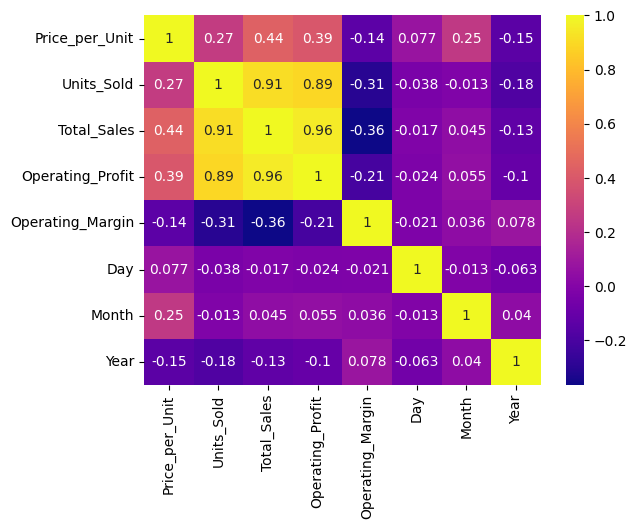

In [39]:
#Vamos a ver la correlación de nuestras variables

corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap = 'plasma', annot= True)
plt.show()

En el cuadro de correlaciones observamos que existen pocas variables que se correlacionen fuertemente entre ellas, de todas las variables numéricas que tenemos.

En este sentido podemos observar que las correlaciones fuertes, por encima del 0.89, y se dan entre las siguientes variables: Units Sold, Total Sales y Operating Profit.

También encontramos correlaciones medias-bajas, entre 0.39 y 0.44 entre Price per Unit, Total Sales y Operating Profit.

El resto de correlaciones son bajas por lo que podemos decir que el resto de variables tienen una correlación baja, casi nula.

In [40]:
data['Season'].value_counts()

Spring    2463
Autumn    2433
Winter    2396
Summer    2356
Name: Season, dtype: int64

In [41]:
data['Region'].value_counts()

West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: Region, dtype: int64

In [42]:
data['Product'].value_counts()

Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: Product, dtype: int64

En esta caso observamos que nuestros datos están repartidos de manera bastante equitativa, dentro de las columnas "Season", "Region" y "Product", nos da una idea para entender que se repite este patrón en el resto de columnas.

En este sentido, podemos decir que no vamos a necesitar realizar procesos de overfitting ni underfitting, ya que encontramos un balanceo de datos adecuado.


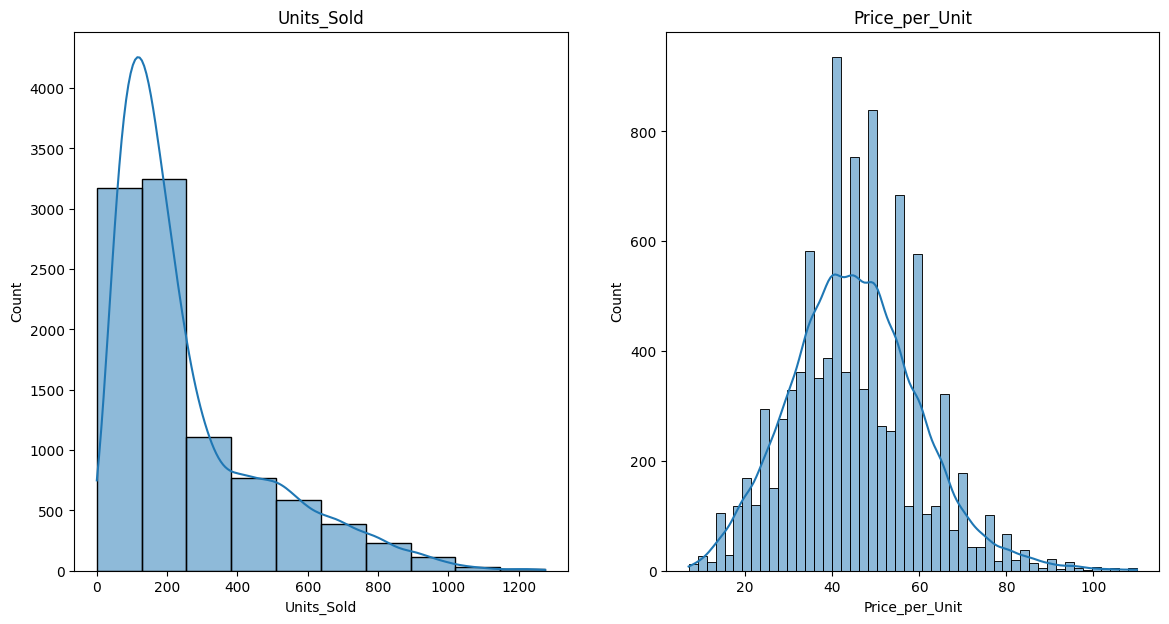

In [43]:
#Realizamos un histiograma de la varibale "Price per Unit" y "Units Sold", para saber en torno a que cifra se agrupan las unidades vendidas y el precio por unidad vendida.

hist = ['Units_Sold', 'Price_per_Unit']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(hist):
    if col == 'Units_Sold':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)


Podemos observar que el número de ventas se agrupa entorno a las 100 unidades, y el precio por unidad se agrupa entorno a 40 dólares por unidad.

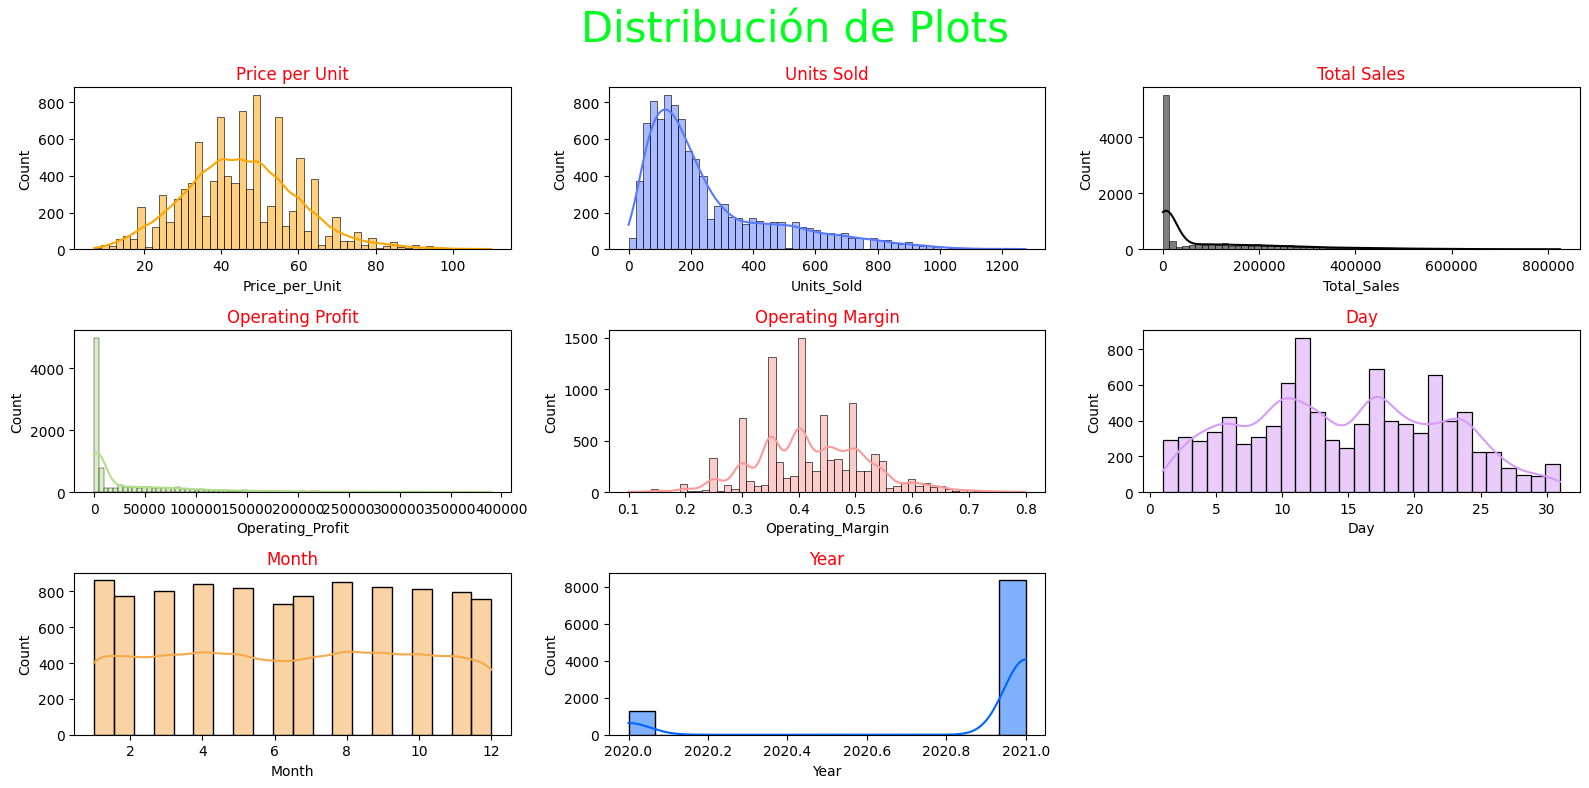

In [44]:
#Obtenemos la distribución de los Plots de todas nuestras variables numéricas

plt.figure(figsize=(16,8))

# Price per Unit
plt.subplot(3,3,1)
plt.title('Price per Unit', color='#FF000B')
sns.histplot(data['Price_per_Unit'], color='orange', kde=True)

# Unist Sold
plt.subplot(3,3,2)
plt.title('Units Sold', color='#FF000B')
sns.histplot(data['Units_Sold'], color='#577AFF', kde=True)

# Total Sales
plt.subplot(3,3,3)
plt.title('Total Sales', color='#FF000B')
sns.histplot(data['Total_Sales'], color='black', kde=True)

# Operating Profit
plt.subplot(3,3,4)
plt.title('Operating Profit', color='#FF000B')
sns.histplot(data['Operating_Profit'], color='#b2df8a', kde=True)

# Operating Margin
plt.subplot(3,3,5)
plt.title('Operating Margin', color='#FF000B')
sns.histplot(data['Operating_Margin'], color='#fb9a99', kde=True)

# Day
plt.subplot(3,3,6)
plt.title('Day', color='#FF000B')
sns.histplot(data['Day'], color='#D69BF6', kde=True)

# Month
plt.subplot(3,3,7)
plt.title('Month', color='#FF000B')
sns.histplot(data['Month'], color='#F4A94B', kde=True)

# Year
plt.subplot(3,3,8)
plt.title('Year', color='#FF000B')
sns.histplot(data['Year'], color='#0064FF', kde=True)

plt.suptitle('Distribución de Plots', color='#00FF20', size = 30)
plt.tight_layout()

Text(0, 0.5, 'Operating_Profit')

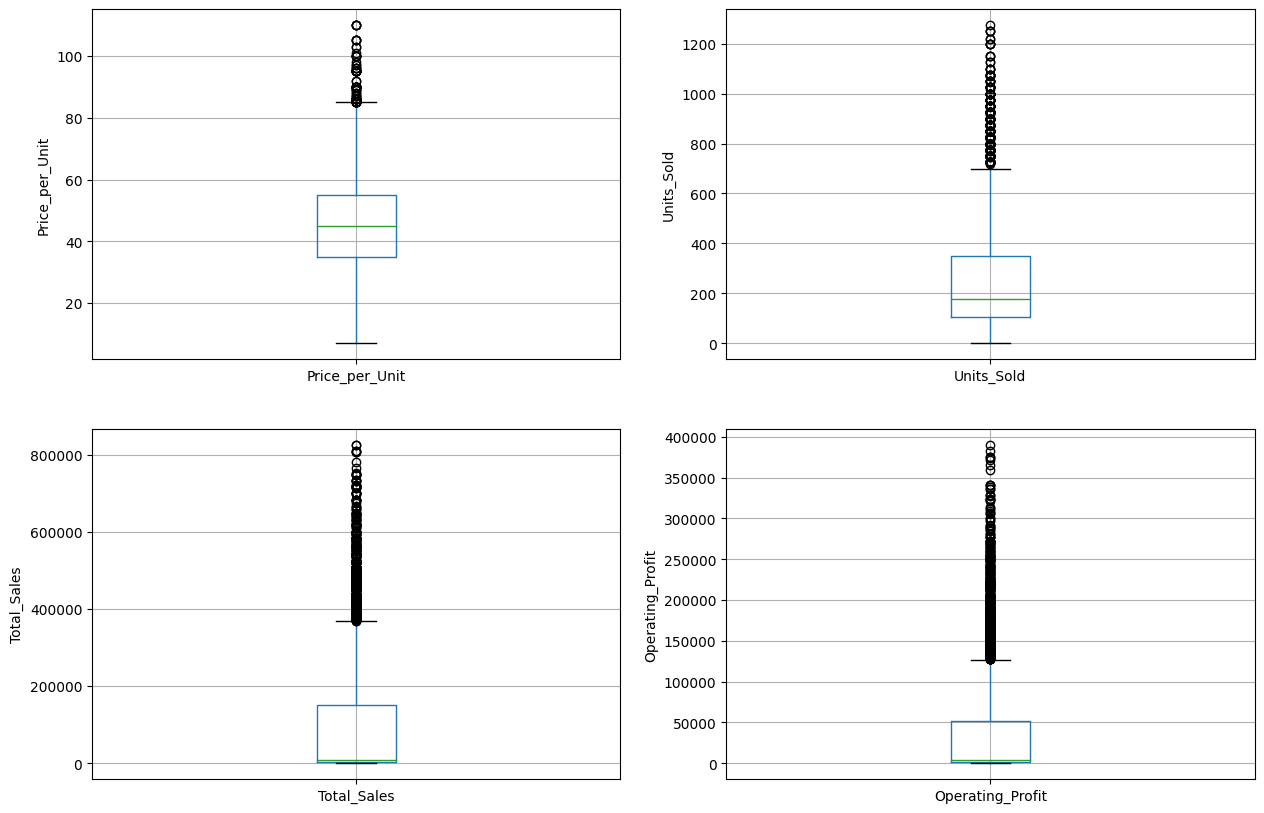

In [45]:
# Realizamos la visualización de boxplots para observar los posibles outliers que podemos obtener.

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.boxplot(column='Price_per_Unit')
fig.set_title('')
fig.set_ylabel('Price_per_Unit')


plt.subplot(2, 2, 2)
fig = data.boxplot(column='Units_Sold')
fig.set_title('')
fig.set_ylabel('Units_Sold')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='Total_Sales')
fig.set_title('')
fig.set_ylabel('Total_Sales')


plt.subplot(2, 2, 4)
fig = data.boxplot(column='Operating_Profit')
fig.set_title('')
fig.set_ylabel('Operating_Profit')

Observamos que en todas las variables que hemos realizado la visualización, nos hemos encontrado con outliers o valores atípicos.

Text(0.5, 0, 'Operating_Profit')

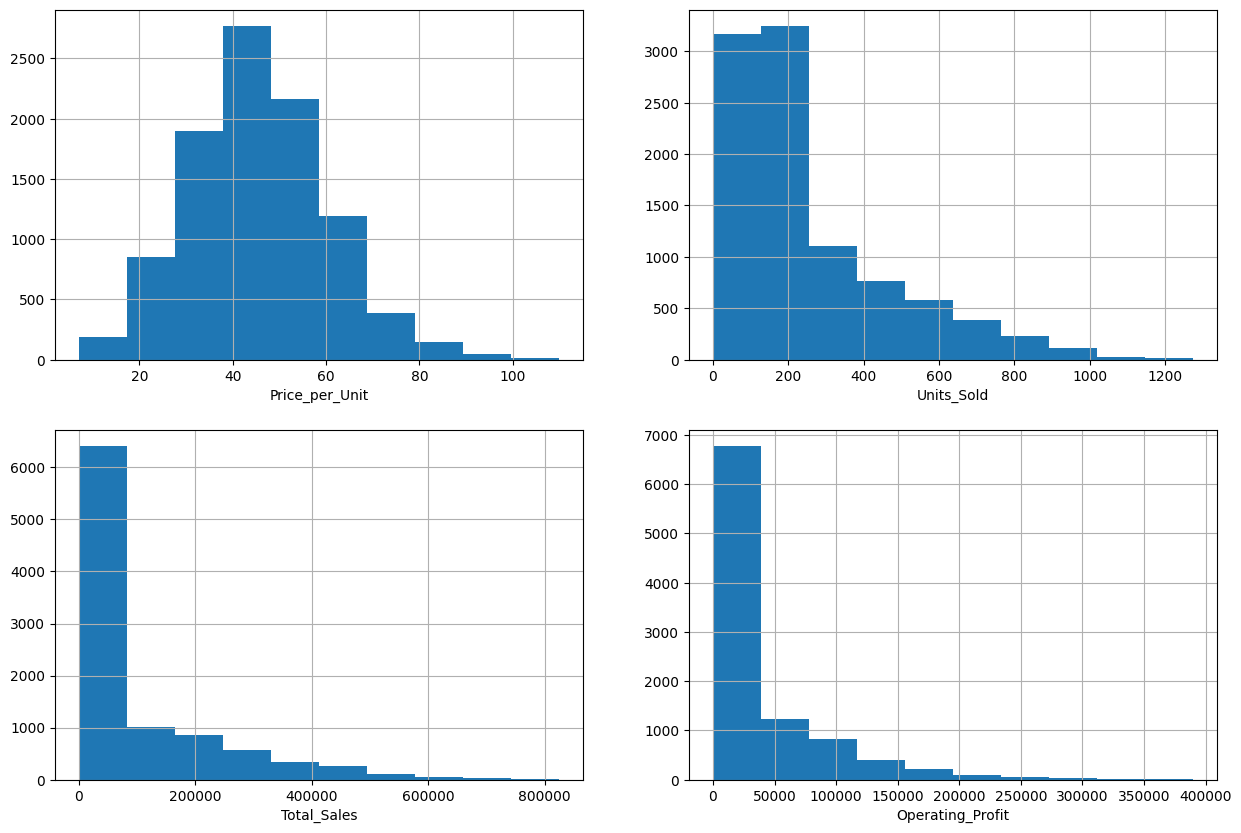

In [46]:
# Distribución de variables

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data.Price_per_Unit.hist(bins=10)
fig.set_xlabel('Price_per_Unit')

plt.subplot(2, 2, 2)
fig = data.Units_Sold.hist(bins=10)
fig.set_xlabel('Units_Sold')

plt.subplot(2, 2, 3)
fig = data.Total_Sales.hist(bins=10)
fig.set_xlabel('Total_Sales')

plt.subplot(2, 2, 4)
fig = data.Operating_Profit.hist(bins=10)
fig.set_xlabel('Operating_Profit')

En la visualización podemos observar que las distribuciones tienes sesgos positivos, y tres de ellas los sesgos están claramente hacia la derecha, mientras que uno tiene una tendencia central.

# **Preprocesamiento de los datos**
En este apartado vamos a realizar las transformaciones finales de nuestros datos, para que el modelo pueda procesar y enterder todos los valores con los que se le está realizando el entrenamiento.
Sabemos que los modelos procesan datos en formato numérico, por lo que es necesario realizar transformaciones de las variables categóricas.  

De esta manera el entrenamiento está mejor diseñado para entender todos los datos que le pasamos, y nos arrojará predicciones más acertadas, y no perdemos información de los datos.



## **Análisis variables categóricas y numéricas**
Realizamos un análisis de varibles para poder realizar las transformaciones necesarias.

In [47]:
# Borramos columnas que no usaremos para el entrenamiento del modelo
data.drop(['Price_per_Unit', 'Units_Sold','Operating_Margin', 'State', 'City'],axis=1,inplace=True)

**Explore Categorical Variables**: realizamos un análisis de nuestras variables categóricas

In [48]:
# Volvemos a analizar las variables categoricas para realizar las transformaciones necesarias

categoricas = [var for var in data.columns if data[var].dtype=='O']

print('Hay {} variables categoricas\n'.format(len(categoricas)))

print('Las variables categoricas son :', categoricas)

Hay 5 variables categoricas

Las variables categoricas son : ['Retailer', 'Region', 'Product', 'Sales_Method', 'Season']


In [49]:
data[categoricas].head()

Retailer     Region                    Product Sales_Method  Season
0  Foot Locker  Northeast      Men's Street Footwear     In-store  Winter
1  Foot Locker  Northeast    Men's Athletic Footwear     In-store  Winter
2  Foot Locker  Northeast    Women's Street Footwear     In-store  Winter
3  Foot Locker  Northeast  Women's Athletic Footwear     In-store  Winter
4  Foot Locker  Northeast              Men's Apparel     In-store  Winter

In [50]:
# Comprobamos cuantas categorías contine cada una de nuestras columnas categoricas

for var in categoricas:

    print(var, ' contains ', len(data[var].unique()), ' labels')

Retailer  contains  6  labels
Region  contains  5  labels
Product  contains  6  labels
Sales_Method  contains  3  labels
Season  contains  4  labels


In [51]:
data['Retailer'].value_counts()

Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: Retailer, dtype: int64

In [52]:
data['Region'].value_counts()

West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: Region, dtype: int64

In [53]:
data['Product'].value_counts()

Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: Product, dtype: int64

In [54]:
data['Sales_Method'].value_counts()

Online      4889
Outlet      3019
In-store    1740
Name: Sales_Method, dtype: int64

In [55]:
data['Season'].value_counts()

Spring    2463
Autumn    2433
Winter    2396
Summer    2356
Name: Season, dtype: int64

En este caso, mostramos el reparto de datos de nuestras columnas, y se observan que no encontramos ninguna variable binaria, es decir con dos valores únicos en las categorías, todas tienen más de dos categorías.

**Realizar "one hot encoding" para las variables categoricas**

In [56]:
pd.get_dummies(data.Retailer, drop_first=False, dummy_na=True).head()

Amazon  Foot Locker  Kohl's  Sports Direct  Walmart  West Gear  NaN
0       0            1       0              0        0          0    0
1       0            1       0              0        0          0    0
2       0            1       0              0        0          0    0
3       0            1       0              0        0          0    0
4       0            1       0              0        0          0    0

In [57]:
pd.get_dummies(data.Region, drop_first=False, dummy_na=True).head()

Midwest  Northeast  South  Southeast  West  NaN
0        0          1      0          0     0    0
1        0          1      0          0     0    0
2        0          1      0          0     0    0
3        0          1      0          0     0    0
4        0          1      0          0     0    0

In [58]:
pd.get_dummies(data.Product, drop_first=False, dummy_na=True).head()

Men's Apparel  Men's Athletic Footwear  Men's Street Footwear  \
0              0                        0                      1   
1              0                        1                      0   
2              0                        0                      0   
3              0                        0                      0   
4              1                        0                      0   

   Women's Apparel  Women's Athletic Footwear  Women's Street Footwear  NaN  
0                0                          0                        0    0  
1                0                          0                        0    0  
2                0                          0                        1    0  
3                0                          1                        0    0  
4                0                          0                        0    0

In [59]:
pd.get_dummies(data.Sales_Method, drop_first=False, dummy_na=True).head()

In-store  Online  Outlet  NaN
0         1       0       0    0
1         1       0       0    0
2         1       0       0    0
3         1       0       0    0
4         1       0       0    0

In [60]:
pd.get_dummies(data.Season, drop_first=False, dummy_na=True).head()

Autumn  Spring  Summer  Winter  NaN
0       0       0       0       1    0
1       0       0       0       1    0
2       0       0       0       1    0
3       0       0       0       1    0
4       0       0       0       1    0

**Explore Numerical Variables**: realizamos un análisis de nuestras variables numéricas

In [61]:
numericas = [var for var in data.columns if data[var].dtype!='O']

print('Hay {} variables numéricas\n'.format(len(numericas)))

print('Las variables numéricas son :', numericas)

Hay 5 variables numéricas

Las variables numéricas son : ['Total_Sales', 'Operating_Profit', 'Day', 'Month', 'Year']


In [62]:
data[numericas].isnull().sum()

Total_Sales         0
Operating_Profit    0
Day                 0
Month               0
Year                0
dtype: int64

Declaramos la variable Total_Sales como la variable target

In [63]:
x = data.drop(['Total_Sales'], axis=1)

y = data['Total_Sales']

Separamos el dataset en datos de entrenamiento y testeo

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [65]:
x_train.shape, x_test.shape

((7718, 9), (1930, 9))

In [66]:
x_train.head()

Retailer     Region                    Product  Operating_Profit  \
725       West Gear  Southeast  Women's Athletic Footwear          81000.00   
1733    Foot Locker    Midwest    Women's Street Footwear          30625.00   
1019    Foot Locker    Midwest  Women's Athletic Footwear              0.00   
6450         Amazon  Southeast  Women's Athletic Footwear            881.28   
1103  Sports Direct      South  Women's Athletic Footwear          96250.00   

     Sales_Method  Day  Month  Year  Season  
725      In-store   15      8  2020  Summer  
1733     In-store   17      3  2021  Spring  
1019       Outlet    5      6  2021  Summer  
6450       Online   23      9  2021  Autumn  
1103       Outlet   28      8  2021  Summer

In [67]:
y_train.head()

725     270000.0
1733     87500.0
1019         0.0
6450      1728.0
1103    175000.0
Name: Total_Sales, dtype: float64

## **Feature Engineering**
Realizamos una extracción y transformación de las variables, para el entrenamiento y la predicción.

In [68]:
x_train.dtypes

Retailer             object
Region               object
Product              object
Operating_Profit    float64
Sales_Method         object
Day                   int64
Month                 int64
Year                  int64
Season               object
dtype: object

In [69]:
categoricas = [col for col in x_train.columns if x_train[col].dtypes == 'O']

categoricas

['Retailer', 'Region', 'Product', 'Sales_Method', 'Season']

In [70]:
numericas = [col for col in x_train.columns if x_train[col].dtypes != 'O']

numericas

['Operating_Profit', 'Day', 'Month', 'Year']

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

Preprocesador de variables categóricas a numéricas

In [72]:
x_train = pd.concat([x_train[numericas],
                     pd.get_dummies(x_train.Retailer),
                     pd.get_dummies(x_train.Region),
                     pd.get_dummies(x_train.Product),
                     pd.get_dummies(x_train.Sales_Method),
                     pd.get_dummies(x_train.Season),], axis=1)

In [73]:
x_train.shape

(7718, 28)

In [74]:
x_train

Operating_Profit  Day  Month  Year  Amazon  Foot Locker  Kohl's  \
725           81000.00   15      8  2020       0            0       0   
1733          30625.00   17      3  2021       0            1       0   
1019              0.00    5      6  2021       0            1       0   
6450            881.28   23      9  2021       1            0       0   
1103          96250.00   28      8  2021       0            0       0   
...                ...  ...    ...   ...     ...          ...     ...   
7891           5686.20    4      9  2020       0            0       0   
9225           1692.80   20      4  2021       0            0       0   
4859           3872.05   18      4  2021       0            0       0   
3264          38500.00   17      6  2021       0            0       0   
2732          37500.00   23      1  2021       0            0       0   

      Sports Direct  Walmart  West Gear  ...  Women's Apparel  \
725               0        0          1  ...                0   
1733              0        0          0  ...                0   
1019              0        0          0  ...                0   
6450              0        0          0  ...                0   
1103              1        0          0  ...                0   
...             ...      ...        ...  ...              ...   
7891              0        1          0  ...                1   
9225              0        0          1  ...                0   
4859              1        0          0  ...                0   
3264              0        0          1  ...                0   
2732              0        0          1  ...                1   

      Women's Athletic Footwear  Women's Street Footwear  In-store  Online  \
725                           1                        0         1       0   
1733                          0                        1         1       0   
1019                          1                        0         0       0   
6450                          1                        0         0       1   
1103                          1                        0         0       0   
...                         ...                      ...       ...     ...   
7891                          0                        0         0       0   
9225                          0                        0         0       0   
4859                          1                        0         0       1   
3264                          1                        0         1       0   
2732                          0                        0         0       1   

      Outlet  Autumn  Spring  Summer  Winter  
725        0       0       0       1       0  
1733       0       0       1       0       0  
1019       1       0       0       1       0  
6450       0       1       0       0       0  
1103       1       0       0       1       0  
...      ...     ...     ...     ...     ...  
7891       1       1       0       0       0  
9225       1       0       1       0       0  
4859       0       0       1       0       0  
3264       0       0       0       1       0  
2732       0       0       0       0       1  

[7718 rows x 28 columns]

In [75]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7718 entries, 725 to 2732
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Operating_Profit           7718 non-null   float64
 1   Day                        7718 non-null   int64  
 2   Month                      7718 non-null   int64  
 3   Year                       7718 non-null   int64  
 4   Amazon                     7718 non-null   uint8  
 5   Foot Locker                7718 non-null   uint8  
 6   Kohl's                     7718 non-null   uint8  
 7   Sports Direct              7718 non-null   uint8  
 8   Walmart                    7718 non-null   uint8  
 9   West Gear                  7718 non-null   uint8  
 10  Midwest                    7718 non-null   uint8  
 11  Northeast                  7718 non-null   uint8  
 12  South                      7718 non-null   uint8  
 13  Southeast                  7718 non-null   uin

In [76]:
x_test = pd.concat([x_test[numericas],
                     pd.get_dummies(x_test.Retailer),
                     pd.get_dummies(x_test.Region),
                     pd.get_dummies(x_test.Product),
                     pd.get_dummies(x_test.Sales_Method),
                     pd.get_dummies(x_test.Season),], axis=1)

In [77]:
x_test.shape

(1930, 28)

In [78]:
x_test

Operating_Profit  Day  Month  Year  Amazon  Foot Locker  Kohl's  \
8132           2698.24   22     10  2021       0            1       0   
6088           4057.56   27      9  2021       0            0       1   
9487           1248.00   14     11  2021       1            0       0   
4943            227.24   11      7  2021       0            1       0   
5475           2553.98   23      3  2021       0            1       0   
...                ...  ...    ...   ...     ...          ...     ...   
1414          93437.50   17     10  2021       0            0       0   
6830           2496.00   11     12  2021       0            0       0   
7890           2713.20    3      9  2020       0            0       0   
5191            514.80    9      3  2021       0            1       0   
6616           1226.25   23      1  2021       0            0       0   

      Sports Direct  Walmart  West Gear  ...  Women's Apparel  \
8132              0        0          0  ...                0   
6088              0        0          0  ...                0   
9487              0        0          0  ...                0   
4943              0        0          0  ...                0   
5475              0        0          0  ...                0   
...             ...      ...        ...  ...              ...   
1414              0        1          0  ...                0   
6830              1        0          0  ...                1   
7890              0        1          0  ...                0   
5191              0        0          0  ...                0   
6616              0        0          1  ...                0   

      Women's Athletic Footwear  Women's Street Footwear  In-store  Online  \
8132                          0                        0         0       0   
6088                          0                        0         0       1   
9487                          0                        0         0       0   
4943                          1                        0         0       1   
5475                          0                        0         0       1   
...                         ...                      ...       ...     ...   
1414                          0                        0         1       0   
6830                          0                        0         0       1   
7890                          0                        0         0       0   
5191                          0                        0         0       1   
6616                          0                        0         0       1   

      Outlet  Autumn  Spring  Summer  Winter  
8132       1       1       0       0       0  
6088       0       1       0       0       0  
9487       1       1       0       0       0  
4943       0       0       0       1       0  
5475       0       0       1       0       0  
...      ...     ...     ...     ...     ...  
1414       0       1       0       0       0  
6830       0       0       0       0       1  
7890       1       1       0       0       0  
5191       0       0       1       0       0  
6616       0       0       0       0       1  

[1930 rows x 28 columns]

## **Feature Scaling**
Realizamos una normalización o estandarización de nuestros datos.

In [79]:
x_train.columns

Index(['Operating_Profit', 'Day', 'Month', 'Year', 'Amazon', 'Foot Locker',
       'Kohl's', 'Sports Direct', 'Walmart', 'West Gear', 'Midwest',
       'Northeast', 'South', 'Southeast', 'West', 'Men's Apparel',
       'Men's Athletic Footwear', 'Men's Street Footwear', 'Women's Apparel',
       'Women's Athletic Footwear', 'Women's Street Footwear', 'In-store',
       'Online', 'Outlet', 'Autumn', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [80]:
cols=x_train.columns

In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [82]:
x_train = pd.DataFrame(x_train, columns=[cols])

In [83]:
x_train

Operating_Profit       Day     Month Year Amazon Foot Locker Kohl's  \
0            0.207692  0.466667  0.636364  0.0    0.0         0.0    0.0   
1            0.078526  0.533333  0.181818  1.0    0.0         1.0    0.0   
2            0.000000  0.133333  0.454545  1.0    0.0         1.0    0.0   
3            0.002260  0.733333  0.727273  1.0    1.0         0.0    0.0   
4            0.246795  0.900000  0.636364  1.0    0.0         0.0    0.0   
...               ...       ...       ...  ...    ...         ...    ...   
7713         0.014580  0.100000  0.727273  0.0    0.0         0.0    0.0   
7714         0.004341  0.633333  0.272727  1.0    0.0         0.0    0.0   
7715         0.009928  0.566667  0.272727  1.0    0.0         0.0    0.0   
7716         0.098718  0.533333  0.454545  1.0    0.0         0.0    0.0   
7717         0.096154  0.733333  0.000000  1.0    0.0         0.0    0.0   

     Sports Direct Walmart West Gear  ... Women's Apparel  \
0              0.0     0.0       1.0  ...             0.0   
1              0.0     0.0       0.0  ...             0.0   
2              0.0     0.0       0.0  ...             0.0   
3              0.0     0.0       0.0  ...             0.0   
4              1.0     0.0       0.0  ...             0.0   
...            ...     ...       ...  ...             ...   
7713           0.0     1.0       0.0  ...             1.0   
7714           0.0     0.0       1.0  ...             0.0   
7715           1.0     0.0       0.0  ...             0.0   
7716           0.0     0.0       1.0  ...             0.0   
7717           0.0     0.0       1.0  ...             1.0   

     Women's Athletic Footwear Women's Street Footwear In-store Online Outlet  \
0                          1.0                     0.0      1.0    0.0    0.0   
1                          0.0                     1.0      1.0    0.0    0.0   
2                          1.0                     0.0      0.0    0.0    1.0   
3                          1.0                     0.0      0.0    1.0    0.0   
4                          1.0                     0.0      0.0    0.0    1.0   
...                        ...                     ...      ...    ...    ...   
7713                       0.0                     0.0      0.0    0.0    1.0   
7714                       0.0                     0.0      0.0    0.0    1.0   
7715                       1.0                     0.0      0.0    1.0    0.0   
7716                       1.0                     0.0      1.0    0.0    0.0   
7717                       0.0                     0.0      0.0    1.0    0.0   

     Autumn Spring Summer Winter  
0       0.0    0.0    1.0    0.0  
1       0.0    1.0    0.0    0.0  
2       0.0    0.0    1.0    0.0  
3       1.0    0.0    0.0    0.0  
4       0.0    0.0    1.0    0.0  
...     ...    ...    ...    ...  
7713    1.0    0.0    0.0    0.0  
7714    0.0    1.0    0.0    0.0  
7715    0.0    1.0    0.0    0.0  
7716    0.0    0.0    1.0    0.0  
7717    0.0    0.0    0.0    1.0  

[7718 rows x 28 columns]

In [84]:
x_test = pd.DataFrame(x_test, columns=[cols])

In [85]:
x_test

Operating_Profit       Day     Month Year Amazon Foot Locker Kohl's  \
0            0.006919  0.700000  0.818182  1.0    0.0         1.0    0.0   
1            0.010404  0.866667  0.727273  1.0    0.0         0.0    1.0   
2            0.003200  0.433333  0.909091  1.0    1.0         0.0    0.0   
3            0.000583  0.333333  0.545455  1.0    0.0         1.0    0.0   
4            0.006549  0.733333  0.181818  1.0    0.0         1.0    0.0   
...               ...       ...       ...  ...    ...         ...    ...   
1925         0.239583  0.533333  0.818182  1.0    0.0         0.0    0.0   
1926         0.006400  0.333333  1.000000  1.0    0.0         0.0    0.0   
1927         0.006957  0.066667  0.727273  0.0    0.0         0.0    0.0   
1928         0.001320  0.266667  0.181818  1.0    0.0         1.0    0.0   
1929         0.003144  0.733333  0.000000  1.0    0.0         0.0    0.0   

     Sports Direct Walmart West Gear  ... Women's Apparel  \
0              0.0     0.0       0.0  ...             0.0   
1              0.0     0.0       0.0  ...             0.0   
2              0.0     0.0       0.0  ...             0.0   
3              0.0     0.0       0.0  ...             0.0   
4              0.0     0.0       0.0  ...             0.0   
...            ...     ...       ...  ...             ...   
1925           0.0     1.0       0.0  ...             0.0   
1926           1.0     0.0       0.0  ...             1.0   
1927           0.0     1.0       0.0  ...             0.0   
1928           0.0     0.0       0.0  ...             0.0   
1929           0.0     0.0       1.0  ...             0.0   

     Women's Athletic Footwear Women's Street Footwear In-store Online Outlet  \
0                          0.0                     0.0      0.0    0.0    1.0   
1                          0.0                     0.0      0.0    1.0    0.0   
2                          0.0                     0.0      0.0    0.0    1.0   
3                          1.0                     0.0      0.0    1.0    0.0   
4                          0.0                     0.0      0.0    1.0    0.0   
...                        ...                     ...      ...    ...    ...   
1925                       0.0                     0.0      1.0    0.0    0.0   
1926                       0.0                     0.0      0.0    1.0    0.0   
1927                       0.0                     0.0      0.0    0.0    1.0   
1928                       0.0                     0.0      0.0    1.0    0.0   
1929                       0.0                     0.0      0.0    1.0    0.0   

     Autumn Spring Summer Winter  
0       1.0    0.0    0.0    0.0  
1       1.0    0.0    0.0    0.0  
2       1.0    0.0    0.0    0.0  
3       0.0    0.0    1.0    0.0  
4       0.0    1.0    0.0    0.0  
...     ...    ...    ...    ...  
1925    1.0    0.0    0.0    0.0  
1926    0.0    0.0    0.0    1.0  
1927    1.0    0.0    0.0    0.0  
1928    0.0    1.0    0.0    0.0  
1929    0.0    0.0    0.0    1.0  

[1930 rows x 28 columns]

In [86]:
transformer4 = ColumnTransformer(transformers=[
    ('scaler', MinMaxScaler(), numericas)
], remainder='passthrough')
transformer4.set_output(transform="pandas")


ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', MinMaxScaler(),
                                 ['Operating_Profit', 'Day', 'Month', 'Year'])])

# **Modelos de entrenamiento de datos**
En este apartado, vamos a realizar un entrenamiento de datos en cinco modelos diferentes para obtener los mejores resultados de nuestros datos.

## **Model training**
En este apartado vamos a ver las columnas de mayor peso para poder entrenar adecuadamente a nuestros modelos, e intentar tener la menor pérdida de datos.

Realizamos feature selection para seleccionar las columnas de mayor peso

In [87]:
from sklearn.feature_selection import SelectKBest, f_regression

# Crear un objeto SelectKBest con la función de puntuación f_regression
kb = SelectKBest(score_func=f_regression, k=10)

# Aplicar la transformación fit_transform() a los datos de entrenamiento (x_train, y_train)
x_train_tr = kb.fit_transform(x_train, y_train)

# Obtener las características seleccionadas
selected_features = x_train.columns[kb.get_support()]



In [88]:
selected_features

MultiIndex([(         'Operating_Profit',),
            (                     'Year',),
            (                  'Midwest',),
            (                'Southeast',),
            (                     'West',),
            (    'Men's Street Footwear',),
            ('Women's Athletic Footwear',),
            (                 'In-store',),
            (                   'Online',),
            (                   'Summer',)],
           )

In [89]:
# Seleccionar solo las características seleccionadas en x_train
x_train_selected = x_train.loc[:, selected_features]

# Seleccionar solo las características seleccionadas en y_train
y_train_selected = y_train



In [90]:
# Seleccionar solo las características seleccionadas en x_test
x_test_selected = x_test.loc[:, selected_features]

# Seleccionar solo las características seleccionadas en y_test
y_test_selected = y_test


In [91]:
y_train

725     270000.0
1733     87500.0
1019         0.0
6450      1728.0
1103    175000.0
          ...   
7891     10530.0
9225      3680.0
4859      5957.0
3264     96250.0
2732     93750.0
Name: Total_Sales, Length: 7718, dtype: float64

In [92]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7718 entries, 0 to 7717
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (Operating_Profit,)           7718 non-null   float64
 1   (Day,)                        7718 non-null   float64
 2   (Month,)                      7718 non-null   float64
 3   (Year,)                       7718 non-null   float64
 4   (Amazon,)                     7718 non-null   float64
 5   (Foot Locker,)                7718 non-null   float64
 6   (Kohl's,)                     7718 non-null   float64
 7   (Sports Direct,)              7718 non-null   float64
 8   (Walmart,)                    7718 non-null   float64
 9   (West Gear,)                  7718 non-null   float64
 10  (Midwest,)                    7718 non-null   float64
 11  (Northeast,)                  7718 non-null   float64
 12  (South,)                      7718 non-null   float64
 13  (So

In [93]:
x_train.describe()

Operating_Profit          Day        Month         Year       Amazon  \
count      7718.000000  7718.000000  7718.000000  7718.000000  7718.000000   
mean          0.089088     0.455032     0.496643     0.864343     0.099378   
std           0.139267     0.245610     0.311858     0.342446     0.299188   
min           0.000000     0.000000     0.000000     0.000000     0.000000   
25%           0.005038     0.266667     0.272727     1.000000     0.000000   
50%           0.011312     0.450000     0.545455     1.000000     0.000000   
75%           0.134615     0.633333     0.727273     1.000000     0.000000   
max           1.000000     1.000000     1.000000     1.000000     1.000000   

       Foot Locker       Kohl's Sports Direct      Walmart    West Gear  ...  \
count  7718.000000  7718.000000   7718.000000  7718.000000  7718.000000  ...   
mean      0.273128     0.105468      0.209640     0.065043     0.247344  ...   
std       0.445595     0.307175      0.407078     0.246617     0.431496  ...   
min       0.000000     0.000000      0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000      0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000      0.000000     0.000000     0.000000  ...   
75%       1.000000     0.000000      0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000      1.000000     1.000000     1.000000  ...   

      Women's Apparel Women's Athletic Footwear Women's Street Footwear  \
count     7718.000000               7718.000000             7718.000000   
mean         0.166494                  0.168437                0.167012   
std          0.372548                  0.374279                0.373011   
min          0.000000                  0.000000                0.000000   
25%          0.000000                  0.000000                0.000000   
50%          0.000000                  0.000000                0.000000   
75%          0.000000                  0.000000                0.000000   
max          1.000000                  1.000000                1.000000   

          In-store       Online       Outlet       Autumn       Spring  \
count  7718.000000  7718.000000  7718.000000  7718.000000  7718.000000   
mean      0.185929     0.503239     0.310832     0.251620     0.257968   
std       0.389075     0.500022     0.462864     0.433972     0.437545   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     1.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Summer       Winter  
count  7718.000000  7718.000000  
mean      0.248769     0.241643  
std       0.432328     0.428107  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000  

[8 rows x 28 columns]

In [94]:
x_train

Operating_Profit       Day     Month Year Amazon Foot Locker Kohl's  \
0            0.207692  0.466667  0.636364  0.0    0.0         0.0    0.0   
1            0.078526  0.533333  0.181818  1.0    0.0         1.0    0.0   
2            0.000000  0.133333  0.454545  1.0    0.0         1.0    0.0   
3            0.002260  0.733333  0.727273  1.0    1.0         0.0    0.0   
4            0.246795  0.900000  0.636364  1.0    0.0         0.0    0.0   
...               ...       ...       ...  ...    ...         ...    ...   
7713         0.014580  0.100000  0.727273  0.0    0.0         0.0    0.0   
7714         0.004341  0.633333  0.272727  1.0    0.0         0.0    0.0   
7715         0.009928  0.566667  0.272727  1.0    0.0         0.0    0.0   
7716         0.098718  0.533333  0.454545  1.0    0.0         0.0    0.0   
7717         0.096154  0.733333  0.000000  1.0    0.0         0.0    0.0   

     Sports Direct Walmart West Gear  ... Women's Apparel  \
0              0.0     0.0       1.0  ...             0.0   
1              0.0     0.0       0.0  ...             0.0   
2              0.0     0.0       0.0  ...             0.0   
3              0.0     0.0       0.0  ...             0.0   
4              1.0     0.0       0.0  ...             0.0   
...            ...     ...       ...  ...             ...   
7713           0.0     1.0       0.0  ...             1.0   
7714           0.0     0.0       1.0  ...             0.0   
7715           1.0     0.0       0.0  ...             0.0   
7716           0.0     0.0       1.0  ...             0.0   
7717           0.0     0.0       1.0  ...             1.0   

     Women's Athletic Footwear Women's Street Footwear In-store Online Outlet  \
0                          1.0                     0.0      1.0    0.0    0.0   
1                          0.0                     1.0      1.0    0.0    0.0   
2                          1.0                     0.0      0.0    0.0    1.0   
3                          1.0                     0.0      0.0    1.0    0.0   
4                          1.0                     0.0      0.0    0.0    1.0   
...                        ...                     ...      ...    ...    ...   
7713                       0.0                     0.0      0.0    0.0    1.0   
7714                       0.0                     0.0      0.0    0.0    1.0   
7715                       1.0                     0.0      0.0    1.0    0.0   
7716                       1.0                     0.0      1.0    0.0    0.0   
7717                       0.0                     0.0      0.0    1.0    0.0   

     Autumn Spring Summer Winter  
0       0.0    0.0    1.0    0.0  
1       0.0    1.0    0.0    0.0  
2       0.0    0.0    1.0    0.0  
3       1.0    0.0    0.0    0.0  
4       0.0    0.0    1.0    0.0  
...     ...    ...    ...    ...  
7713    1.0    0.0    0.0    0.0  
7714    0.0    1.0    0.0    0.0  
7715    0.0    1.0    0.0    0.0  
7716    0.0    0.0    1.0    0.0  
7717    0.0    0.0    0.0    1.0  

[7718 rows x 28 columns]

In [95]:
# métricas de evaluación
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

## **Primer modelo: Regresión Lineal**

In [97]:
model1 = linear_model.LinearRegression()

In [98]:
# fit the model
model1.fit(x_train, y_train)

LinearRegression()

In [99]:
y_pred1 = model1.predict(x_test)

In [100]:
#calculamos métricas de evaluación
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
medae = median_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

# Imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Median Absolute Error (MedAE):", medae)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 1451219288.6569953
Mean Absolute Error (MAE): 20519.282901554405
Median Absolute Error (MedAE): 11747.0
R^2 Score: 0.9234456673790472


In [101]:
# Crear un DataFrame con las etiquetas reales y predichas
results_reg1 = pd.DataFrame({'Real': y_test, 'Predicho': y_pred1})

# Mostrar los primeros 10 resultados para comparación
print(results_reg1.head(20))

          Real  Predicho
8132    4352.0   -1280.0
6088    7956.0   27392.0
9487    3900.0    8960.0
4943     437.0    -256.0
5475    5434.0    3840.0
4606    7820.0   36096.0
6928    2331.0    3840.0
7799   12987.0   25344.0
4244    3780.0   -6400.0
1831  148750.0  166656.0
578   157500.0  169728.0
839    31250.0   41216.0
834    67500.0   65280.0
2554  157500.0  153856.0
6609   13601.0    5888.0
4770    2464.0    2304.0
7953   12887.0   37120.0
1892  315000.0  260352.0
7240    2772.0    1280.0
3654  100000.0  110848.0


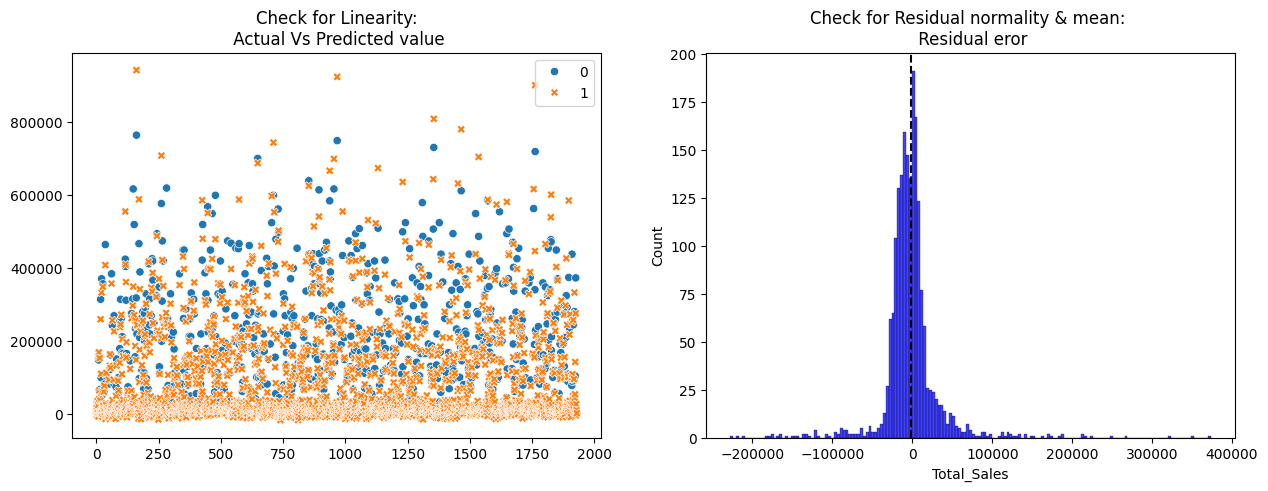

In [102]:
# Check for Linearity

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_pred1), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred1), ax=ax, color='b')
ax.axvline((y_test - y_pred1).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

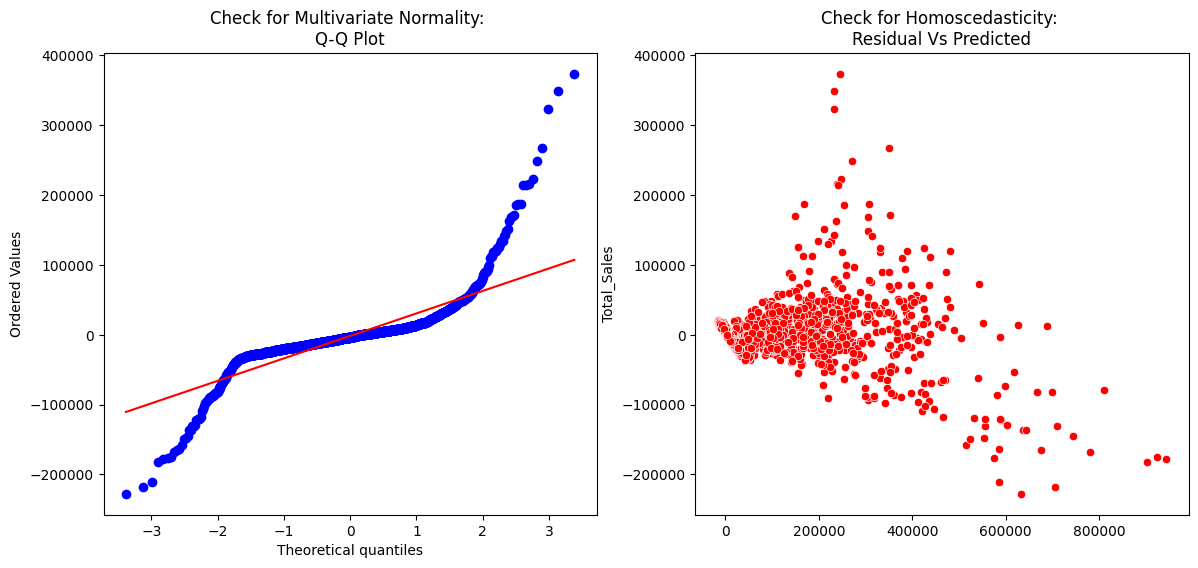

In [103]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred1),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred1), x= y_pred1, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [104]:
# Comprobamos la multicolinealidad
VIF = 1/(1- r2_score(y_test, y_pred1))
VIF

13.0626179572533

### **Probamos con las columnas seleccionas por feature selection**

In [105]:
model1.fit(x_train_selected, y_train_selected)

LinearRegression()

In [106]:
y_pred2 = model1.predict(x_test_selected)

In [107]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test_selected, y_pred2)
mae = mean_absolute_error(y_test_selected, y_pred2)
medae = median_absolute_error(y_test_selected, y_pred2)
r2 = r2_score(y_test_selected, y_pred2)

# Imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Median Absolute Error (MedAE):", medae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 1468804965.033728
Mean Absolute Error (MAE): 19713.048254786685
Median Absolute Error (MedAE): 10098.189686622809
R^2 Score: 0.9225179924720008


In [108]:
# Crear un DataFrame con las etiquetas reales y predichas
results_reg2 = pd.DataFrame({'Real': y_test_selected, 'Predicho': y_pred2})

# Mostrar los primeros 10 resultados para comparación
print(results_reg2.head(10))

          Real       Predicho
8132    4352.0    3616.956248
6088    7956.0   22379.502765
9487    3900.0    7449.481520
4943     437.0   -1011.570264
5475    5434.0    5414.740666
4606    7820.0   36861.359450
6928    2331.0   -1754.232936
7799   12987.0   23313.525593
4244    3780.0   -1464.199961
1831  148750.0  169932.170189


## **Segundo modelo: Random Forest**

In [109]:
model2 = RandomForestRegressor (n_estimators = 5)
model2.fit(x_train, y_train)
y_pred3 = model2.predict(x_test)

In [110]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred3)
mae = mean_absolute_error(y_test, y_pred3)
medae = median_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

# Imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Median Absolute Error (MedAE):", medae)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 742614872.1333886
Mean Absolute Error (MAE): 10779.527046632124
Median Absolute Error (MedAE): 1000.0
R^2 Score: 0.9608257784506318


In [111]:
# Crear un DataFrame con las etiquetas reales y predichas
results_rnf1 = pd.DataFrame({'Real': y_test, 'Predicho': y_pred3})

# Mostrar los primeros 10 resultados para comparación
print(results_rnf1.head(20))


          Real  Predicho
8132    4352.0    6588.0
6088    7956.0    8463.6
9487    3900.0    3541.8
4943     437.0     486.8
5475    5434.0    5174.8
4606    7820.0    8065.6
6928    2331.0    2334.6
7799   12987.0    8648.8
4244    3780.0    3361.6
1831  148750.0  157000.0
578   157500.0  170250.0
839    31250.0   36500.0
834    67500.0   67000.0
2554  157500.0  150750.0
6609   13601.0   15339.8
4770    2464.0    2854.8
7953   12887.0   13979.6
1892  315000.0  288000.0
7240    2772.0    2945.4
3654  100000.0  112000.0


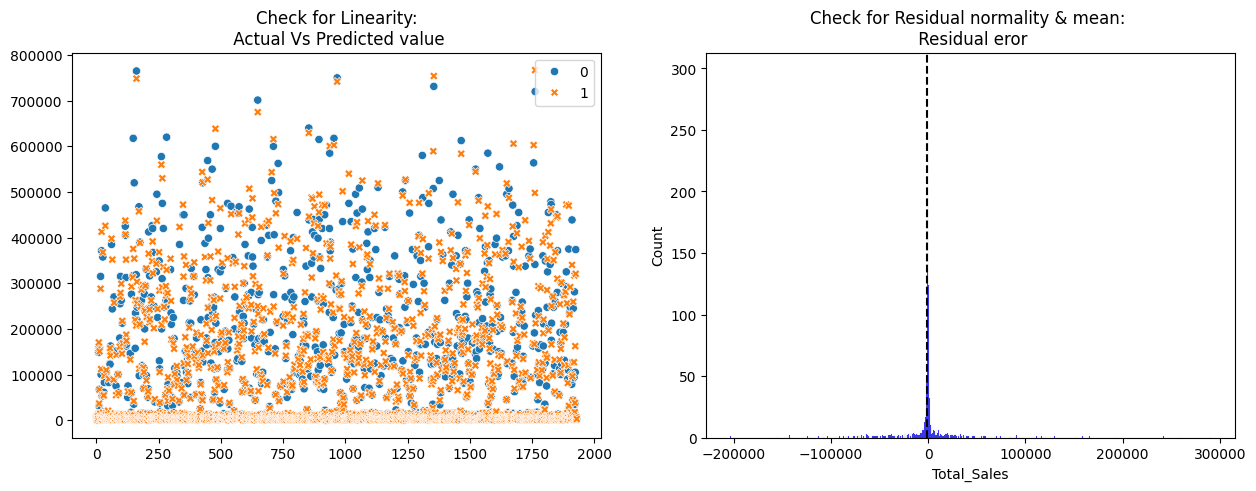

In [112]:
# Check for Linearity
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_pred3), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred3), ax=ax, color='b')
ax.axvline((y_test - y_pred3).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

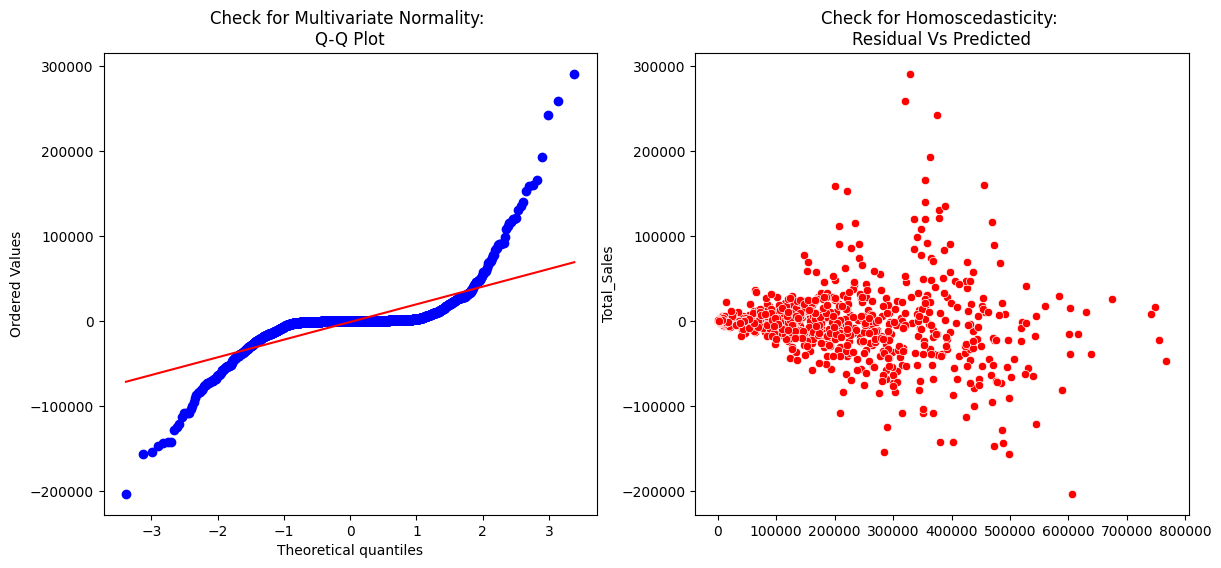

In [113]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred3),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred3), x= y_pred3, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [114]:
# Comprobamos la multicolinealidad

VIF = 1/(1- r2_score(y_test, y_pred3))
VIF

25.52699097644551

### **Probamos con las columnas seleccionas por feature selection**

In [115]:
model2.fit(x_train_selected, y_train_selected)

RandomForestRegressor(n_estimators=5)

In [116]:
y_pred4 = model2.predict(x_test_selected)

In [117]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test_selected, y_pred4)
mae = mean_absolute_error(y_test_selected, y_pred4)
medae = median_absolute_error(y_test_selected, y_pred4)
r2 = r2_score(y_test_selected, y_pred4)

# Imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Median Absolute Error (MedAE):", medae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 978672996.2722186
Mean Absolute Error (MAE): 11994.330827916472
Median Absolute Error (MedAE): 1040.3999999999996
R^2 Score: 0.9483733032840937


In [118]:
# Crear un DataFrame con las etiquetas reales y predichas
results_rnf2 = pd.DataFrame({'Real': y_test_selected, 'Predicho': y_pred4})

# Mostrar los primeros 10 resultados para comparación
print(results_rnf2.head(20))

          Real  Predicho
8132    4352.0    6258.0
6088    7956.0    8570.4
9487    3900.0    2707.2
4943     437.0     520.4
5475    5434.0    5143.2
4606    7820.0    8225.6
6928    2331.0    2185.2
7799   12987.0    8114.4
4244    3780.0    3477.6
1831  148750.0  146750.0
578   157500.0  219000.0
839    31250.0   33269.6
834    67500.0   67750.0
2554  157500.0  165500.0
6609   13601.0   13344.0
4770    2464.0    3805.0
7953   12887.0    6528.4
1892  315000.0  303000.0
7240    2772.0    3120.0
3654  100000.0  100000.0


## **Tercer modelo: Decision Tree**

In [119]:
model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)
y_pred5 = model3.predict(x_test)

In [120]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred5)
mae = mean_absolute_error(y_test, y_pred5)
medae = median_absolute_error(y_test, y_pred5)
r2 = r2_score(y_test, y_pred5)

# Imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Median Absolute Error (MedAE):", medae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 1141990100.2082903
Mean Absolute Error (MAE): 12024.0103626943
Median Absolute Error (MedAE): 763.0
R^2 Score: 0.9397580430025252


In [121]:
# Crear un DataFrame con las etiquetas reales y predichas
results_dtr1 = pd.DataFrame({'Real': y_test, 'Predicho': y_pred5})

# Mostrar los primeros 10 resultados para comparación
print(results_dtr1.head(20))

          Real  Predicho
8132    4352.0    6120.0
6088    7956.0    9936.0
9487    3900.0    3468.0
4943     437.0     468.0
5475    5434.0    5069.0
4606    7820.0    7038.0
6928    2331.0    2244.0
7799   12987.0   12540.0
4244    3780.0    3840.0
1831  148750.0  148750.0
578   157500.0  220000.0
839    31250.0   37500.0
834    67500.0   61250.0
2554  157500.0  157500.0
6609   13601.0   15552.0
4770    2464.0    3159.0
7953   12887.0   13066.0
1892  315000.0  420000.0
7240    2772.0    2584.0
3654  100000.0  100000.0


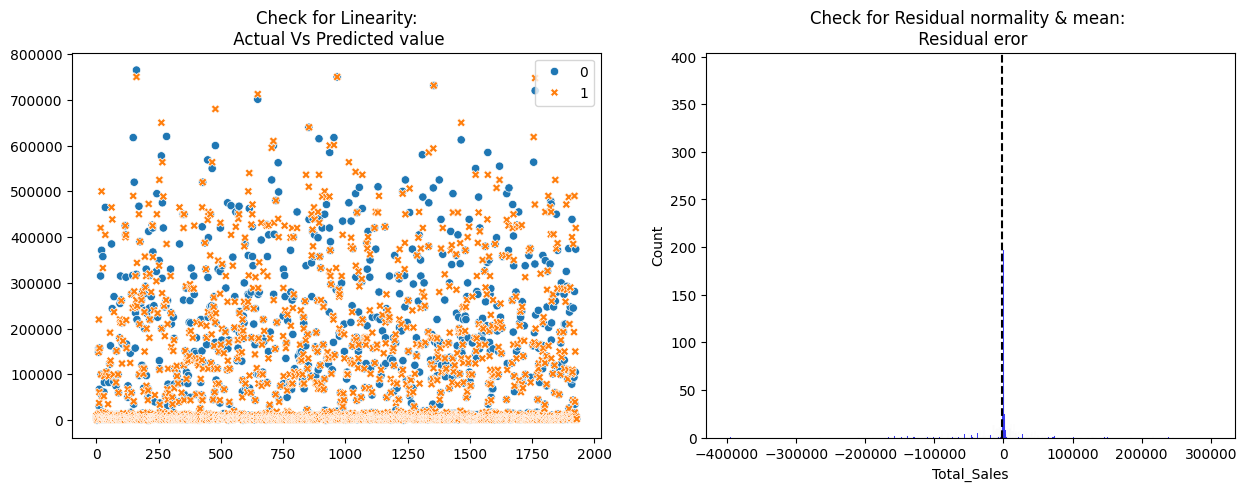

In [122]:
# Check for Linearity
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_pred5), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred5), ax=ax, color='b')
ax.axvline((y_test - y_pred5).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

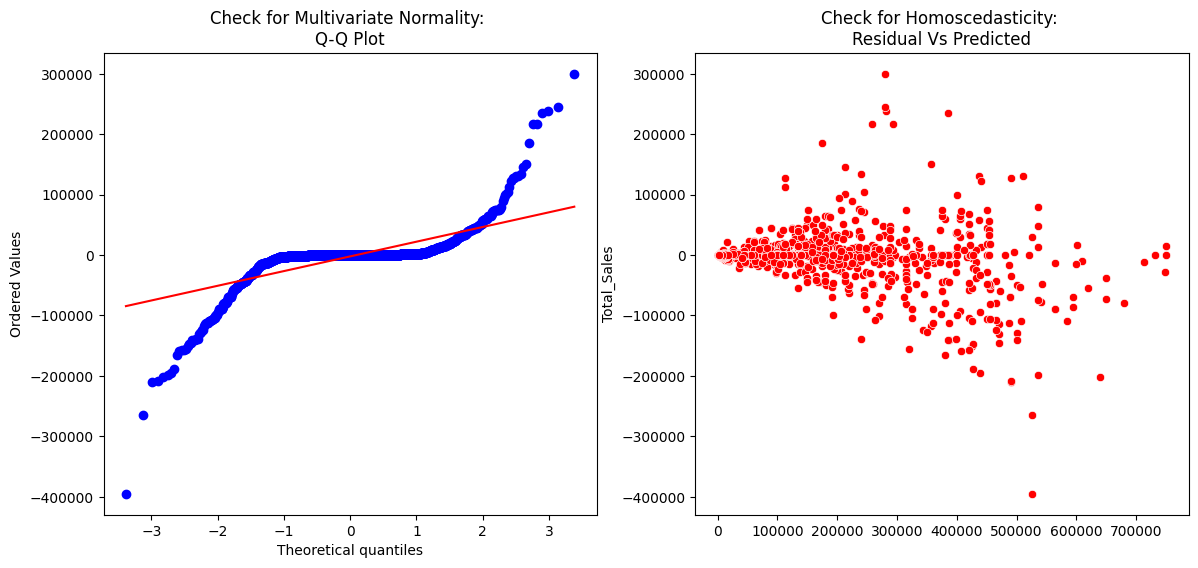

In [123]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred5),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred5), x= y_pred5, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [124]:
# Comprobamos la multicolinealidad

VIF = 1/(1- r2_score(y_test, y_pred5))
VIF

16.59972633428754

### **Probamos con las columnas seleccionas por feature selection**

In [125]:
model3.fit(x_train_selected, y_train_selected)

DecisionTreeRegressor()

In [126]:
y_pred6 = model3.predict(x_test_selected)

In [127]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test_selected, y_pred6)
mae = mean_absolute_error(y_test_selected, y_pred6)
medae = median_absolute_error(y_test_selected, y_pred6)
r2 = r2_score(y_test_selected, y_pred6)

# Imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Median Absolute Error (MedAE):", medae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 1203162117.7232912
Mean Absolute Error (MAE): 12494.466732461553
Median Absolute Error (MedAE): 812.0
R^2 Score: 0.9365311130598617


In [128]:
# Crear un DataFrame con las etiquetas reales y predichas
results_dtr2 = pd.DataFrame({'Real': y_test_selected, 'Predicho': y_pred6})

# Mostrar los primeros 10 resultados para comparación
print(results_dtr2.head(20))

          Real  Predicho
8132    4352.0    6426.0
6088    7956.0    7548.0
9487    3900.0    2960.0
4943     437.0     528.0
5475    5434.0    5069.0
4606    7820.0    9375.0
6928    2331.0    2146.0
7799   12987.0    8478.0
4244    3780.0    3780.0
1831  148750.0  150000.0
578   157500.0  275000.0
839    31250.0   37500.0
834    67500.0   67500.0
2554  157500.0  157500.0
6609   13601.0   13050.0
4770    2464.0    3036.0
7953   12887.0    7840.0
1892  315000.0  315000.0
7240    2772.0    3120.0
3654  100000.0  100000.0


## **Cuarto modelo: K Neighbors**

In [129]:
model4 = KNeighborsRegressor(n_neighbors=5)
model4.fit(x_train, y_train)
y_pred7 = model4.predict(x_test)

In [130]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred7)
mae = mean_absolute_error(y_test, y_pred7)
medae = median_absolute_error(y_test, y_pred7)
r2 = r2_score(y_test, y_pred7)

# Imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Median Absolute Error (MedAE):", medae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 9845283823.326115
Mean Absolute Error (MAE): 56781.83098445596
Median Absolute Error (MedAE): 23685.399999999998
R^2 Score: 0.4806442152129261


In [131]:
# Crear un DataFrame con las etiquetas reales y predichas
results_kng1 = pd.DataFrame({'Real': y_test, 'Predicho': y_pred7})

# Mostrar los primeros 10 resultados para comparación
print(results_kng1.head(20))

          Real  Predicho
8132    4352.0   41809.2
6088    7956.0  210510.0
9487    3900.0   55298.0
4943     437.0   15165.2
5475    5434.0  144416.8
4606    7820.0  101799.6
6928    2331.0   13222.6
7799   12987.0  108233.4
4244    3780.0    8569.0
1831  148750.0  353750.0
578   157500.0  335000.0
839    31250.0   56250.0
834    67500.0   47352.8
2554  157500.0   52840.4
6609   13601.0  245373.2
4770    2464.0    3569.8
7953   12887.0    9765.2
1892  315000.0  149000.0
7240    2772.0    3171.0
3654  100000.0   76250.0


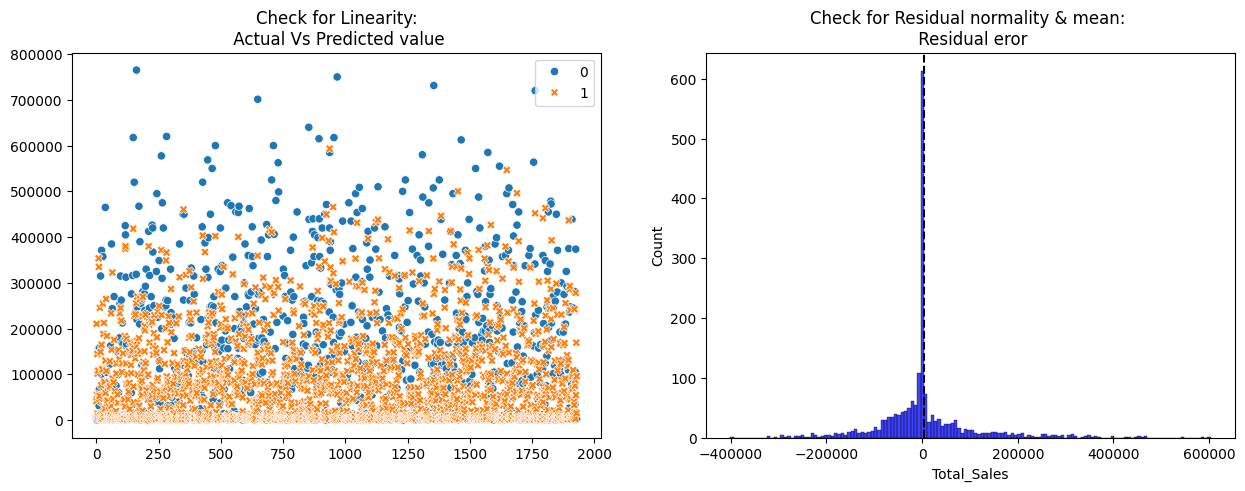

In [132]:
# Check for Linearity
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_pred7), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred7), ax=ax, color='b')
ax.axvline((y_test - y_pred7).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

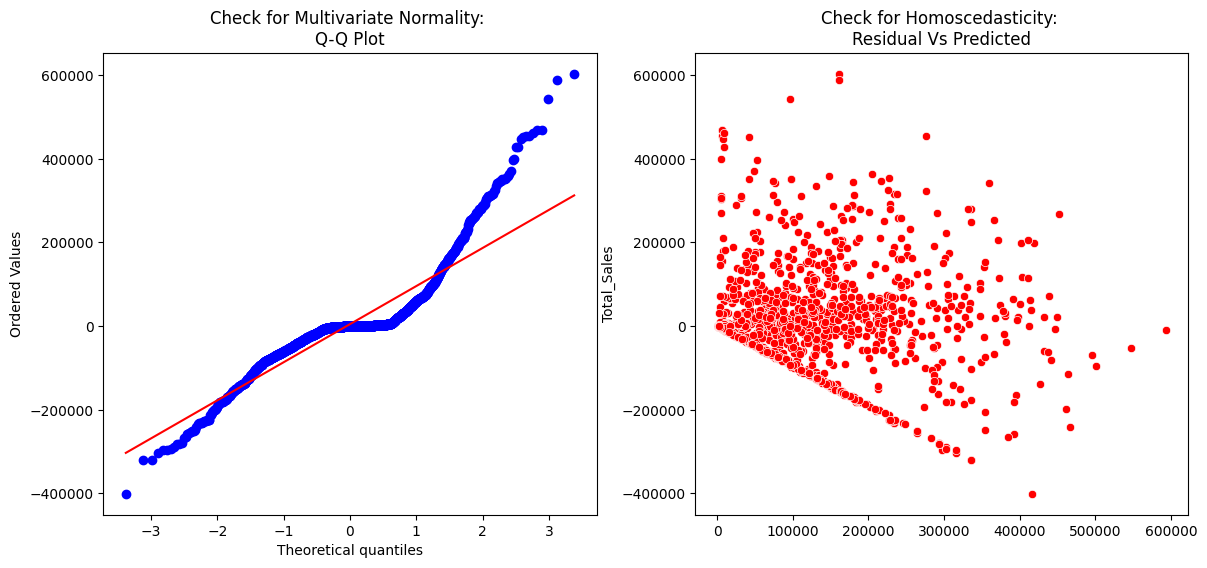

In [133]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred7),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred7), x= y_pred7, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [134]:
# Comprobamos la multicolinealidad

VIF = 1/(1- r2_score(y_test, y_pred7))
VIF

1.9254623310106793

### **Probamos con las columnas seleccionas por feature selection**

In [135]:
model4.fit(x_train_selected, y_train_selected)

KNeighborsRegressor()

In [136]:
y_pred8 = model4.predict(x_test_selected)

In [137]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test_selected, y_pred8)
mae = mean_absolute_error(y_test_selected, y_pred8)
medae = median_absolute_error(y_test_selected, y_pred8)
r2 = r2_score(y_test_selected, y_pred8)

# Imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Median Absolute Error (MedAE):", medae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 1175473494.0457826
Mean Absolute Error (MAE): 13741.894611398964
Median Absolute Error (MedAE): 1208.6000000000004
R^2 Score: 0.9379917359466936


In [138]:
# Crear un DataFrame con las etiquetas reales y predichas
results_kng2 = pd.DataFrame({'Real': y_test_selected, 'Predicho': y_pred8})

# Mostrar los primeros 10 resultados para comparación
print(results_kng2.head(20))

          Real  Predicho
8132    4352.0    6224.4
6088    7956.0    9266.6
9487    3900.0    3237.2
4943     437.0     420.0
5475    5434.0    5279.6
4606    7820.0    8341.8
6928    2331.0    2296.6
7799   12987.0    9879.4
4244    3780.0    3873.2
1831  148750.0  155250.0
578   157500.0  266750.0
839    31250.0   83250.0
834    67500.0   68850.0
2554  157500.0  128250.0
6609   13601.0   12941.0
4770    2464.0    3539.4
7953   12887.0    8954.4
1892  315000.0  278250.0
7240    2772.0    2648.4
3654  100000.0  120250.0


## **Quinto modelo: Support Vector Machine (SVM)**

### **1º Opción**

In [190]:
from sklearn.svm import SVR
model5 = SVR()
model5.fit(x_train, y_train)

SVR()

In [191]:
from sklearn.metrics import mean_absolute_error

y_pred9 = model5.predict(x_test)


In [192]:
# Calcular métricas
mse = mean_squared_error(y_test, y_pred9)
mae = mean_absolute_error(y_test, y_pred9)
medae = median_absolute_error(y_test, y_pred9)
r2 = r2_score(y_test, y_pred9)

# Imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Median Absolute Error (MedAE):", medae)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 25165383589.97393
Mean Absolute Error (MAE): 84173.24037963407
Median Absolute Error (MedAE): 7212.55853671867
R^2 Score: -0.32751759912424605


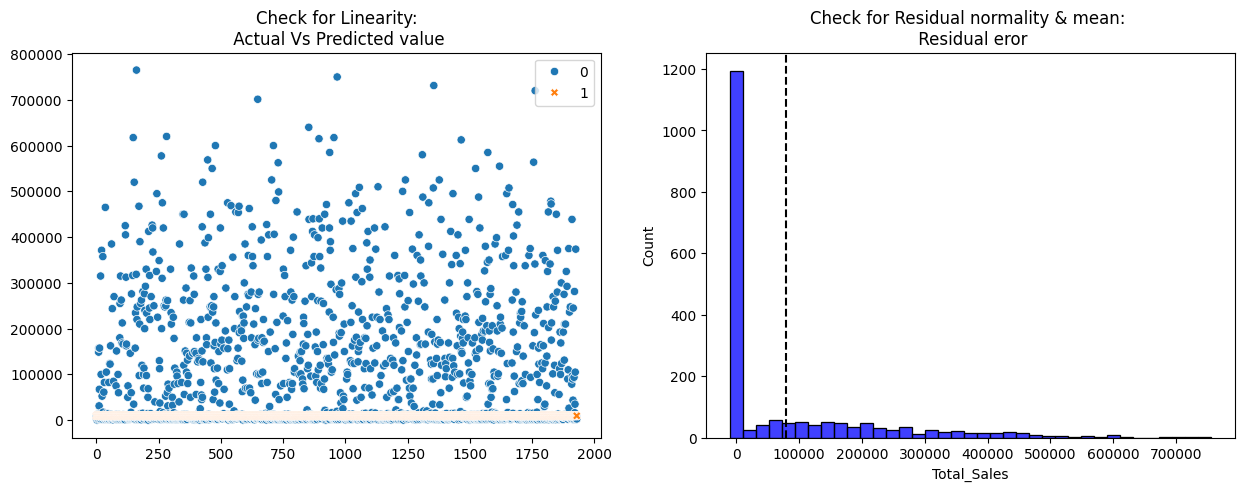

In [193]:
# Check for Linearity

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_pred9), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred9), ax=ax, color='b')
ax.axvline((y_test - y_pred9).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

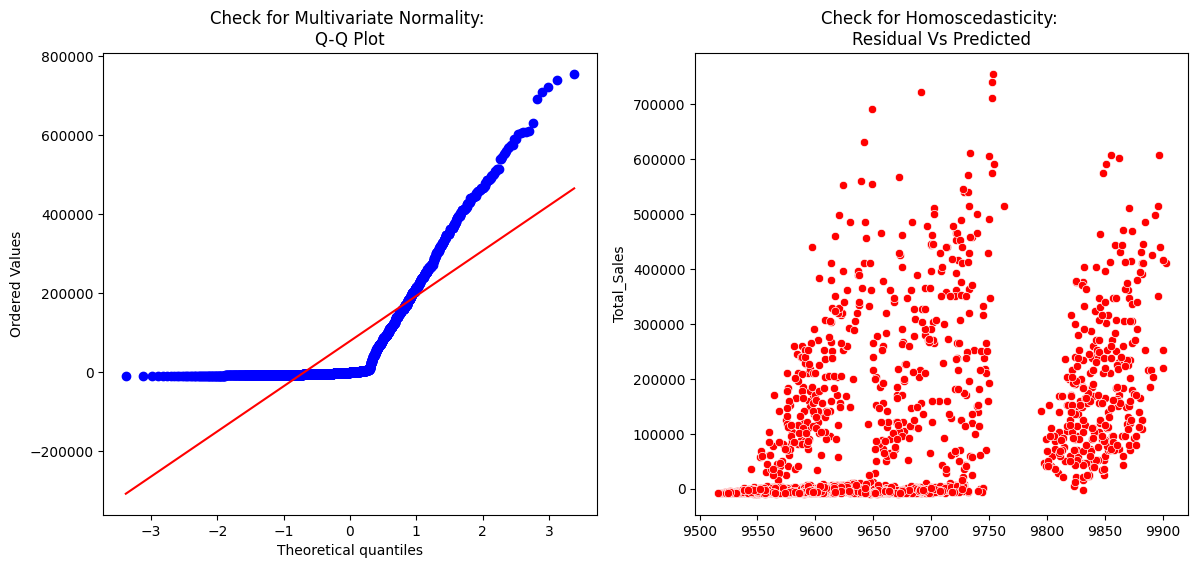

In [194]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred9),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred9), x= y_pred9, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [195]:
# Comprobamos la multicolinealidad
VIF = 1/(1- r2_score(y_test, y_pred9))
VIF

0.7532856819824407

### **2º Opción**

In [187]:
from sklearn.svm import SVR
model6 = SVR(kernel = "linear")
model6.fit(x_train, y_train)

SVR(kernel='linear')

In [188]:
y_pred10 = model6.predict(x_test)


In [189]:
# Calculamos las métricas
mse = mean_squared_error(y_test, y_pred10)
mae = mean_absolute_error(y_test, y_pred10)
medae = median_absolute_error(y_test, y_pred10)
r2 = r2_score(y_test, y_pred10)

# Imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Median Absolute Error (MedAE):", medae)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 24985850596.228706
Mean Absolute Error (MAE): 83733.05645412515
Median Absolute Error (MedAE): 7147.520099754469
R^2 Score: -0.31804692255108225


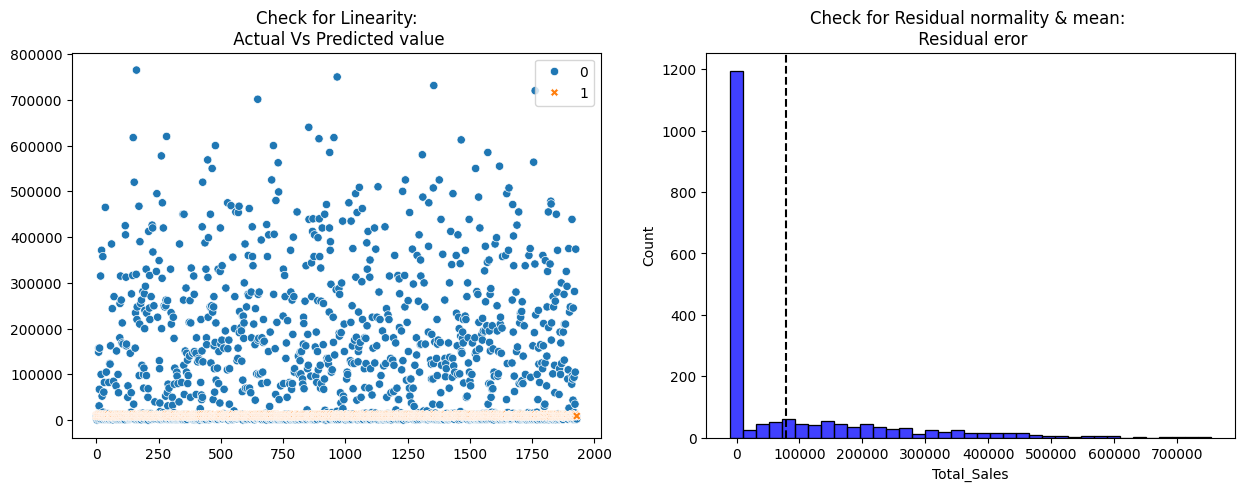

In [196]:
# Check for Linearity

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
sns.scatterplot((np.array(y_test),y_pred10), ax=ax, color='r', legend=True)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred10), ax=ax, color='b')
ax.axvline((y_test - y_pred10).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

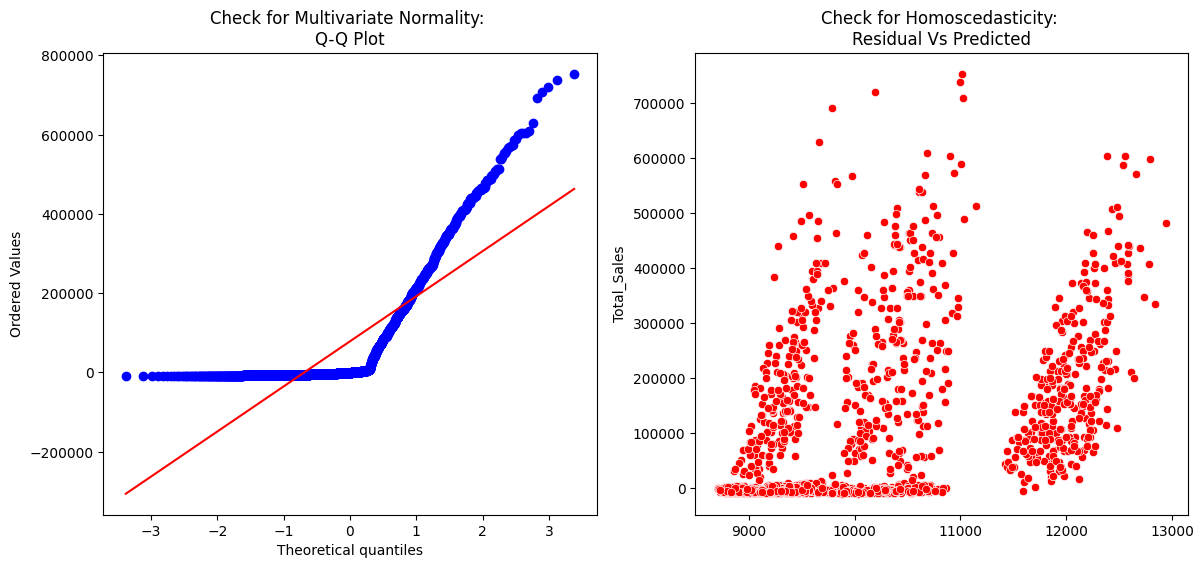

In [197]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred10),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred10), x= y_pred10, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');


El resultado que hemos obtenido en las dos opciones para el error absoluto medio (MAE) es bastante elevado, indicando que las predicciones del modelo SVR están desviadas en promedio en una cantidad significativa de los valores reales.

El valor de MAE tan alto nos indica que es posible que el modelo no está ajustando adecuadamente los datos.

In [198]:
# Comprobamos la multicolinealidad
VIF = 1/(1- r2_score(y_test, y_pred10))
VIF

0.7586983307578293

## **Selección de modelo**

Elegimos el modelo de Random Forest al tener el mayor valor de score.

In [143]:
# Calcular la diferencia absoluta entre las etiquetas predichas y las etiquetas reales
diferencia_absoluta = abs(y_pred3 - y_test)

# Crear un DataFrame con las etiquetas reales, predichas y la diferencia absoluta
results_rnf1 = pd.DataFrame({'Real': y_test, 'Predicho': y_pred3, 'Diferencia Absoluta': diferencia_absoluta})

In [144]:
results_rnf1

Real  Predicho  Diferencia Absoluta
8132    4352.0    6588.0               2236.0
6088    7956.0    8463.6                507.6
9487    3900.0    3541.8                358.2
4943     437.0     486.8                 49.8
5475    5434.0    5174.8                259.2
...        ...       ...                  ...
1414  373750.0  320750.0              53000.0
6830    4800.0    5051.2                251.2
7890    7980.0    6825.2               1154.8
5191    1980.0    1197.4                782.6
6616    2725.0    2629.2                 95.8

[1930 rows x 3 columns]

Comparamos el resultado de y_test con y_pred3

In [145]:
data.columns

Index(['Retailer', 'Region', 'Product', 'Total_Sales', 'Operating_Profit',
       'Sales_Method', 'Day', 'Month', 'Year', 'Season'],
      dtype='object')

In [146]:
data2=data.copy()

In [147]:
data2.shape

(9648, 10)

In [148]:
x2 = data.drop(['Total_Sales'],axis=1)
y2 = data['Total_Sales']

In [149]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [150]:
x2_train.shape, x2_test.shape

((7718, 9), (1930, 9))

In [151]:
import pandas as pd

# Crear un DataFrame para y_pred3
df_predicciones = pd.DataFrame(y_pred3, columns=['Predicted_sales'])

# Concatenar x2_test, y2_test y y_pred3 a lo largo de las columnas
nuevo_dataset = pd.concat([x2_test.reset_index(drop=True),
                           y2_test.reset_index(drop=True),
                           df_predicciones], axis=1)

# Imprimir las primeras filas del nuevo dataset
print(nuevo_dataset.head())


      Retailer     Region                    Product  Operating_Profit  \
0  Foot Locker      South      Men's Street Footwear           2698.24   
1       Kohl's       West    Men's Athletic Footwear           4057.56   
2       Amazon  Northeast              Men's Apparel           1248.00   
3  Foot Locker    Midwest  Women's Athletic Footwear            227.24   
4  Foot Locker  Southeast      Men's Street Footwear           2553.98   

  Sales_Method  Day  Month  Year  Season  Total_Sales  Predicted_sales  
0       Outlet   22     10  2021  Autumn       4352.0           6588.0  
1       Online   27      9  2021  Autumn       7956.0           8463.6  
2       Outlet   14     11  2021  Autumn       3900.0           3541.8  
3       Online   11      7  2021  Summer        437.0            486.8  
4       Online   23      3  2021  Spring       5434.0           5174.8  


In [152]:
nuevo_dataset.shape

(1930, 11)

In [153]:
nuevo_dataset.columns

Index(['Retailer', 'Region', 'Product', 'Operating_Profit', 'Sales_Method',
       'Day', 'Month', 'Year', 'Season', 'Total_Sales', 'Predicted_sales'],
      dtype='object')

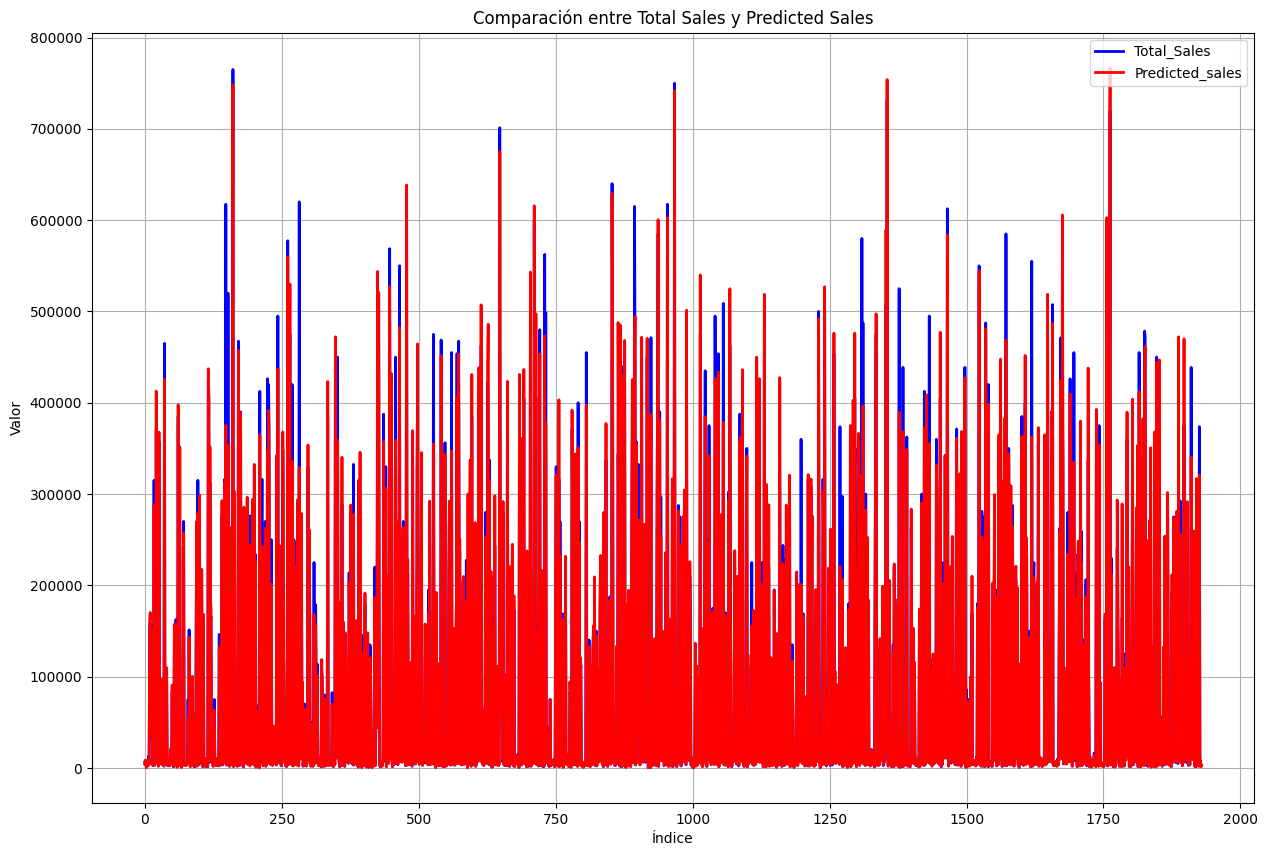

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Graficar Total_Sales y Predicciones usando un gráfico de línea con mayor grosor y color claro
plt.plot(nuevo_dataset.index, nuevo_dataset['Total_Sales'], label='Total_Sales', linewidth=2, color='blue')
plt.plot(nuevo_dataset.index, nuevo_dataset['Predicted_sales'], label='Predicted_sales', linewidth=2, color='red')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre Total Sales y Predicted Sales')
plt.legend()
plt.grid(True)  # Agregar cuadrícula
plt.show()

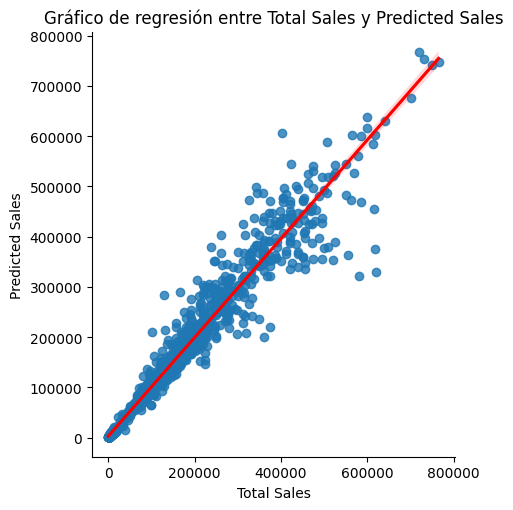

In [155]:
# Crear un gráfico de regresión
sns.lmplot(x='Total_Sales', y='Predicted_sales', data=nuevo_dataset, line_kws={'color': 'red'})
plt.title('Gráfico de regresión entre Total Sales y Predicted Sales')
plt.xlabel('Total Sales')
plt.ylabel('Predicted Sales')
plt.show()

# **Predicciones**
Tras los modelos entrenados, y la selección del más adecuado con un score mayor, realizamos las predicciones por diferentes modelos.

## **Modelo Arima**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

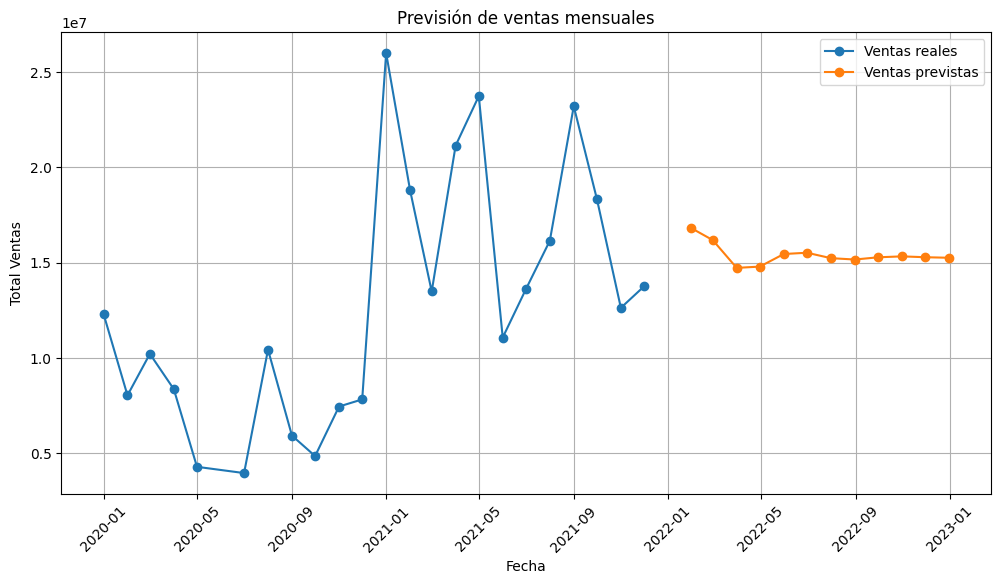

In [156]:

# Ajustar el modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Orden: (p, d, q)
modelo_ventas = ARIMA(ventas_mensuales, order=(2, 1, 2))
modelo_entrenado = modelo_ventas.fit()

# Hacer predicciones para los próximos 12 meses
pasos_pronostico = 12
pronostico = modelo_entrenado.forecast(steps=pasos_pronostico)

# Visualizar los datos de ventas reales y los valores pronosticados para los próximos meses.
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales.index, ventas_mensuales.values, marker='o', label='Ventas reales')
plt.plot(pd.date_range(start=ventas_mensuales.index[-1], periods=pasos_pronostico + 1, freq='M')[1:], pronostico, marker='o', label='Ventas previstas')
plt.xlabel('Fecha')
plt.ylabel('Total Ventas')
plt.title('Previsión de ventas mensuales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [157]:
x_train.columns

MultiIndex([(         'Operating_Profit',),
            (                      'Day',),
            (                    'Month',),
            (                     'Year',),
            (                   'Amazon',),
            (              'Foot Locker',),
            (                   'Kohl's',),
            (            'Sports Direct',),
            (                  'Walmart',),
            (                'West Gear',),
            (                  'Midwest',),
            (                'Northeast',),
            (                    'South',),
            (                'Southeast',),
            (                     'West',),
            (            'Men's Apparel',),
            (  'Men's Athletic Footwear',),
            (    'Men's Street Footwear',),
            (          'Women's Apparel',),
            ('Women's Athletic Footwear',),
            (  'Women's Street Footwear',),
            (                 'In-store',),
            (                   

## **Otra forma**

In [158]:
# Crear un rango de fechas que cubra todo el año 2024
fechas_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Crear un DataFrame con las fechas
new_dataset = pd.DataFrame({'Fecha': fechas_2024})

# Separar la columna de fechas en año, mes y día
new_dataset['Year'] = new_dataset['Fecha'].dt.year
new_dataset['Month'] = new_dataset['Fecha'].dt.month
new_dataset['Day'] = new_dataset['Fecha'].dt.day

# Eliminar la columna original de fechas
new_dataset.drop(columns=['Fecha'], inplace=True)

# Visualizar el nuevo conjunto de datos antes de eliminar la columna Fecha
print(new_dataset)



     Year  Month  Day
0    2024      1    1
1    2024      1    2
2    2024      1    3
3    2024      1    4
4    2024      1    5
..    ...    ...  ...
361  2024     12   27
362  2024     12   28
363  2024     12   29
364  2024     12   30
365  2024     12   31

[366 rows x 3 columns]


In [159]:
new_dataset = pd.merge(new_dataset, pd.DataFrame(data=data['Retailer'].unique(), columns=['Retailer']), how='cross')
new_dataset = pd.merge(new_dataset, pd.DataFrame(data=data['Region'].unique(), columns=['Region']), how='cross')

In [160]:
new_dataset.columns

Index(['Year', 'Month', 'Day', 'Retailer', 'Region'], dtype='object')

In [161]:
new_dataset

Year  Month  Day     Retailer     Region
0      2024      1    1  Foot Locker  Northeast
1      2024      1    1  Foot Locker      South
2      2024      1    1  Foot Locker       West
3      2024      1    1  Foot Locker    Midwest
4      2024      1    1  Foot Locker  Southeast
...     ...    ...  ...          ...        ...
10975  2024     12   31       Amazon  Northeast
10976  2024     12   31       Amazon      South
10977  2024     12   31       Amazon       West
10978  2024     12   31       Amazon    Midwest
10979  2024     12   31       Amazon  Southeast

[10980 rows x 5 columns]

In [162]:
new_dataset = pd.merge(new_dataset, pd.DataFrame(data=data['Product'].unique(), columns=['Product']), how='cross')
new_dataset = pd.merge(new_dataset, pd.DataFrame(data=data['Sales_Method'].unique(), columns=['Sales_Method']), how='cross')
new_dataset = pd.merge(new_dataset, pd.DataFrame(data=data['Season'].unique(), columns=['Season']), how='cross')

In [163]:
new_dataset

Year  Month  Day     Retailer     Region                Product  \
0       2024      1    1  Foot Locker  Northeast  Men's Street Footwear   
1       2024      1    1  Foot Locker  Northeast  Men's Street Footwear   
2       2024      1    1  Foot Locker  Northeast  Men's Street Footwear   
3       2024      1    1  Foot Locker  Northeast  Men's Street Footwear   
4       2024      1    1  Foot Locker  Northeast  Men's Street Footwear   
...      ...    ...  ...          ...        ...                    ...   
790555  2024     12   31       Amazon  Southeast        Women's Apparel   
790556  2024     12   31       Amazon  Southeast        Women's Apparel   
790557  2024     12   31       Amazon  Southeast        Women's Apparel   
790558  2024     12   31       Amazon  Southeast        Women's Apparel   
790559  2024     12   31       Amazon  Southeast        Women's Apparel   

       Sales_Method  Season  
0          In-store  Winter  
1          In-store  Spring  
2          In-store  Summer  
3          In-store  Autumn  
4            Outlet  Winter  
...             ...     ...  
790555       Outlet  Autumn  
790556       Online  Winter  
790557       Online  Spring  
790558       Online  Summer  
790559       Online  Autumn  

[790560 rows x 8 columns]

In [164]:
new_dataset['Operating_Profit'] = np.random.rand(len(new_dataset))

In [165]:
new_dataset

Year  Month  Day     Retailer     Region                Product  \
0       2024      1    1  Foot Locker  Northeast  Men's Street Footwear   
1       2024      1    1  Foot Locker  Northeast  Men's Street Footwear   
2       2024      1    1  Foot Locker  Northeast  Men's Street Footwear   
3       2024      1    1  Foot Locker  Northeast  Men's Street Footwear   
4       2024      1    1  Foot Locker  Northeast  Men's Street Footwear   
...      ...    ...  ...          ...        ...                    ...   
790555  2024     12   31       Amazon  Southeast        Women's Apparel   
790556  2024     12   31       Amazon  Southeast        Women's Apparel   
790557  2024     12   31       Amazon  Southeast        Women's Apparel   
790558  2024     12   31       Amazon  Southeast        Women's Apparel   
790559  2024     12   31       Amazon  Southeast        Women's Apparel   

       Sales_Method  Season  Operating_Profit  
0          In-store  Winter          0.070484  
1          In-store  Spring          0.386376  
2          In-store  Summer          0.828409  
3          In-store  Autumn          0.091722  
4            Outlet  Winter          0.248564  
...             ...     ...               ...  
790555       Outlet  Autumn          0.162964  
790556       Online  Winter          0.259026  
790557       Online  Spring          0.470847  
790558       Online  Summer          0.999583  
790559       Online  Autumn          0.854987  

[790560 rows x 9 columns]

In [166]:
new_categoricas = [col for col in new_dataset.columns if new_dataset[col].dtypes == 'O']

new_categoricas

['Retailer', 'Region', 'Product', 'Sales_Method', 'Season']

In [167]:
new_numericas = [col for col in new_dataset.columns if new_dataset[col].dtypes != 'O']

new_numericas

['Year', 'Month', 'Day', 'Operating_Profit']

In [168]:
new_dataset = pd.concat([new_dataset[new_numericas],
                     pd.get_dummies(new_dataset.Retailer),
                     pd.get_dummies(new_dataset.Region),
                     pd.get_dummies(new_dataset.Product),
                     pd.get_dummies(new_dataset.Sales_Method),
                     pd.get_dummies(new_dataset.Season),], axis=1)

In [169]:
new_dataset

Year  Month  Day  Operating_Profit  Amazon  Foot Locker  Kohl's  \
0       2024      1    1          0.070484       0            1       0   
1       2024      1    1          0.386376       0            1       0   
2       2024      1    1          0.828409       0            1       0   
3       2024      1    1          0.091722       0            1       0   
4       2024      1    1          0.248564       0            1       0   
...      ...    ...  ...               ...     ...          ...     ...   
790555  2024     12   31          0.162964       1            0       0   
790556  2024     12   31          0.259026       1            0       0   
790557  2024     12   31          0.470847       1            0       0   
790558  2024     12   31          0.999583       1            0       0   
790559  2024     12   31          0.854987       1            0       0   

        Sports Direct  Walmart  West Gear  ...  Women's Apparel  \
0                   0        0          0  ...                0   
1                   0        0          0  ...                0   
2                   0        0          0  ...                0   
3                   0        0          0  ...                0   
4                   0        0          0  ...                0   
...               ...      ...        ...  ...              ...   
790555              0        0          0  ...                1   
790556              0        0          0  ...                1   
790557              0        0          0  ...                1   
790558              0        0          0  ...                1   
790559              0        0          0  ...                1   

        Women's Athletic Footwear  Women's Street Footwear  In-store  Online  \
0                               0                        0         1       0   
1                               0                        0         1       0   
2                               0                        0         1       0   
3                               0                        0         1       0   
4                               0                        0         0       0   
...                           ...                      ...       ...     ...   
790555                          0                        0         0       0   
790556                          0                        0         0       1   
790557                          0                        0         0       1   
790558                          0                        0         0       1   
790559                          0                        0         0       1   

        Outlet  Autumn  Spring  Summer  Winter  
0            0       0       0       0       1  
1            0       0       1       0       0  
2            0       0       0       1       0  
3            0       1       0       0       0  
4            1       0       0       0       1  
...        ...     ...     ...     ...     ...  
790555       1       1       0       0       0  
790556       0       0       0       0       1  
790557       0       0       1       0       0  
790558       0       0       0       1       0  
790559       0       1       0       0       0  

[790560 rows x 28 columns]

In [170]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790560 entries, 0 to 790559
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Year                       790560 non-null  int64  
 1   Month                      790560 non-null  int64  
 2   Day                        790560 non-null  int64  
 3   Operating_Profit           790560 non-null  float64
 4   Amazon                     790560 non-null  uint8  
 5   Foot Locker                790560 non-null  uint8  
 6   Kohl's                     790560 non-null  uint8  
 7   Sports Direct              790560 non-null  uint8  
 8   Walmart                    790560 non-null  uint8  
 9   West Gear                  790560 non-null  uint8  
 10  Midwest                    790560 non-null  uint8  
 11  Northeast                  790560 non-null  uint8  
 12  South                      790560 non-null  uint8  
 13  Southeast                  79

In [171]:
cols_new=new_dataset.columns

ordenamos las columnas del new_dataset igual que el dataset x_train

In [172]:
cols

Index(['Operating_Profit', 'Day', 'Month', 'Year', 'Amazon', 'Foot Locker',
       'Kohl's', 'Sports Direct', 'Walmart', 'West Gear', 'Midwest',
       'Northeast', 'South', 'Southeast', 'West', 'Men's Apparel',
       'Men's Athletic Footwear', 'Men's Street Footwear', 'Women's Apparel',
       'Women's Athletic Footwear', 'Women's Street Footwear', 'In-store',
       'Online', 'Outlet', 'Autumn', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [173]:
# Obtener el orden de las características en x_train
columnas_ordenadas = cols.tolist()

# Ordenar las columnas de new_dataset en el mismo orden
new_dataset = new_dataset[columnas_ordenadas]


In [174]:
new_dataset.shape

(790560, 28)

In [175]:
#new_dataset = scaler.transform(new_dataset)

In [176]:
model2 = RandomForestRegressor (n_estimators = 5)

In [177]:
model2.fit(x_train, y_train)

RandomForestRegressor(n_estimators=5)

In [178]:
y_new_pred = model2.predict(new_dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [179]:
y_new_pred

array([ 69250., 355250., 771250., ..., 463500., 682500., 682500.])

In [180]:
new_dataset = new_dataset.assign(Total_sales=y_new_pred)

In [181]:
new_dataset

Operating_Profit  Day  Month  Year  Amazon  Foot Locker  Kohl's  \
0               0.070484    1      1  2024       0            1       0   
1               0.386376    1      1  2024       0            1       0   
2               0.828409    1      1  2024       0            1       0   
3               0.091722    1      1  2024       0            1       0   
4               0.248564    1      1  2024       0            1       0   
...                  ...  ...    ...   ...     ...          ...     ...   
790555          0.162964   31     12  2024       1            0       0   
790556          0.259026   31     12  2024       1            0       0   
790557          0.470847   31     12  2024       1            0       0   
790558          0.999583   31     12  2024       1            0       0   
790559          0.854987   31     12  2024       1            0       0   

        Sports Direct  Walmart  West Gear  ...  Women's Athletic Footwear  \
0                   0        0          0  ...                          0   
1                   0        0          0  ...                          0   
2                   0        0          0  ...                          0   
3                   0        0          0  ...                          0   
4                   0        0          0  ...                          0   
...               ...      ...        ...  ...                        ...   
790555              0        0          0  ...                          0   
790556              0        0          0  ...                          0   
790557              0        0          0  ...                          0   
790558              0        0          0  ...                          0   
790559              0        0          0  ...                          0   

        Women's Street Footwear  In-store  Online  Outlet  Autumn  Spring  \
0                             0         1       0       0       0       0   
1                             0         1       0       0       0       1   
2                             0         1       0       0       0       0   
3                             0         1       0       0       1       0   
4                             0         0       0       1       0       0   
...                         ...       ...     ...     ...     ...     ...   
790555                        0         0       0       1       1       0   
790556                        0         0       1       0       0       0   
790557                        0         0       1       0       0       1   
790558                        0         0       1       0       0       0   
790559                        0         0       1       0       1       0   

        Summer  Winter  Total_sales  
0            0       1      69250.0  
1            0       0     355250.0  
2            1       0     771250.0  
3            0       0     111000.0  
4            0       1     264000.0  
...        ...     ...          ...  
790555       0       0     207250.0  
790556       0       1     237000.0  
790557       0       0     463500.0  
790558       1       0     682500.0  
790559       0       0     682500.0  

[790560 rows x 29 columns]

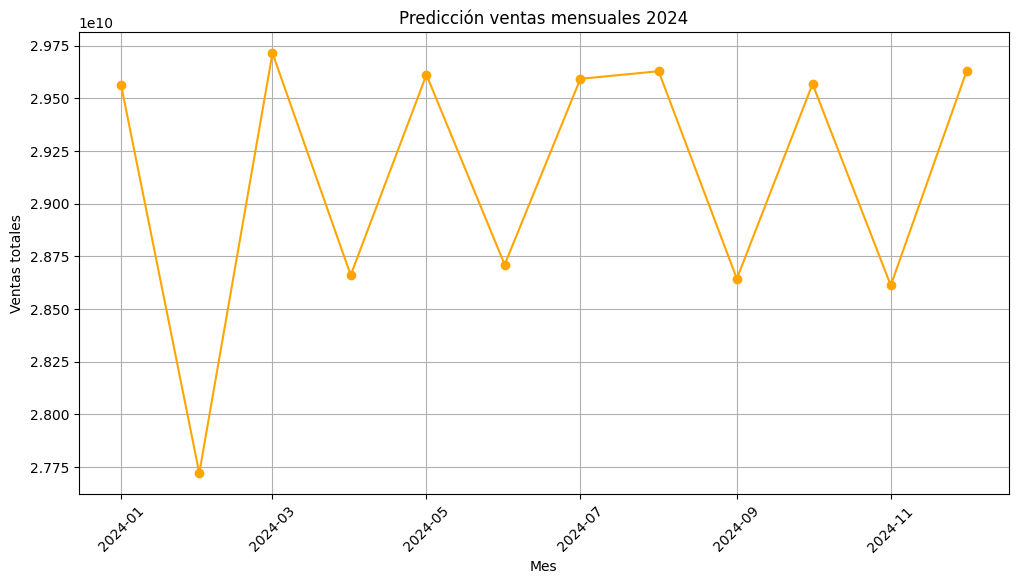

In [182]:
# Crear una nueva columna de fecha combinando 'Year', 'Month' y 'Day'
new_dataset['Fecha'] = pd.to_datetime(new_dataset[['Year', 'Month', 'Day']])

# Agrupar por mes y calcular las ventas totales de cada mes
ventas_mensuales = new_dataset.groupby(new_dataset['Fecha'].dt.to_period('M'))['Total_sales'].sum()

# Convertir el índice (que es de tipo 'Periodo') en objetos DateTime
ventas_mensuales.index = ventas_mensuales.index.to_timestamp()

# Trazar las tendencias de ventas a lo largo del tiempo con color naranja
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales.index, ventas_mensuales.values, marker='o', color='orange')
plt.xlabel('Mes')
plt.ylabel('Ventas totales')
plt.title('Predicción ventas mensuales 2024')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


